<!-- dom:TITLE: Project 1 on Machine Learning, deadline October 4, 2020 -->
# Project 1 on Machine Learning, deadline October 4, 2020
<!-- dom:AUTHOR: [Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html) at University of Oslo, Norway -->
<!-- Author: -->  
**[Data Analysis and Machine Learning FYS-STK3155/FYS4155](http://www.uio.no/studier/emner/matnat/fys/FYS3155/index-eng.html)**, University of Oslo, Norway

Date: **Sep 10, 2021**

## Regression analysis and resampling methods

The main aim of this project is to study in more detail various
regression methods, including the Ordinary Least Squares (OLS) method,
The total score is **100** points. Each subtask has its own final score.


We will first study how to fit polynomials to a specific
two-dimensional function called [Franke's
function](http://www.dtic.mil/dtic/tr/fulltext/u2/a081688.pdf).  This
is a function which has been widely used when testing various
interpolation and fitting algorithms. Furthermore, after having
established the model and the method, we will employ resamling
techniques such as cross-validation and/or bootstrap in order to perform a
proper assessment of our models. We will also study in detail the
so-called Bias-Variance trade off.


The Franke function, which is a weighted sum of four exponentials  reads as follows

$$
\begin{align*}
f(x,y) &= \frac{3}{4}\exp{\left(-\frac{(9x-2)^2}{4} - \frac{(9y-2)^2}{4}\right)}+\frac{3}{4}\exp{\left(-\frac{(9x+1)^2}{49}- \frac{(9y+1)}{10}\right)} \\
&+\frac{1}{2}\exp{\left(-\frac{(9x-7)^2}{4} - \frac{(9y-3)^2}{4}\right)} -\frac{1}{5}\exp{\left(-(9x-4)^2 - (9y-7)^2\right) }.
\end{align*}
$$

The function will be defined for $x,y\in [0,1]$.  Our first step will
be to perform an OLS regression analysis of this function, trying out
a polynomial fit with an $x$ and $y$ dependence of the form $[x, y,
x^2, y^2, xy, \dots]$. We will also include bootstrap first as
a resampling technique.  After that we will include the cross-validation technique. As in homeworks 1 and 2, we can use a uniform
distribution to set up the arrays of values for $x$ and $y$, or as in
the example below just a set of fixed 
values for $x$ and $y$ with a given step
size.  We will fit a
function (for example a polynomial) of $x$ and $y$.  Thereafter we
will repeat much of the same procedure using the Ridge and Lasso
regression methods, introducing thus a dependence on the bias
(penalty) $\lambda$.

Finally we are going to use (real) digital terrain data and try to
reproduce these data using the same methods. We will also try to go
beyond the second-order polynomials metioned above and explore 
which polynomial fits the data best.


The Python code for the Franke function is included here (it performs also a three-dimensional plot of it)

In [1]:
from IPython.display import display
from IPython.display import Markdown as md
#%matplotlib inline

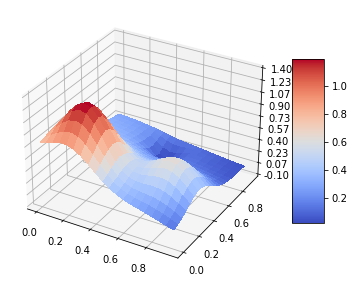

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)

def FrankeFunction(x,y, noise_std=1, add_noise=False):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    np.random.seed(1436) # Use same random number generator
    noise = np.random.normal(0, noise_std, len(x)) if add_noise else 0
    return term1 + term2 + term3 + term4 + noise

noise_std = 1
z = FrankeFunction(x, y, noise_std)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])

def plot_Franke(fig, ax, x, y, z, clr=cm.coolwarm):

    # Plot the surface.
    surf = ax.plot_surface(x, y, z, cmap=clr,
                           linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
plot_Franke(fig, ax, x, y, z)
plt.show()

### Exercise 1: Ordinary Least Square (OLS) on the Franke function (score 10 points)

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $\cal{N}(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) or use your code from
homeworks 1 and 2 and perform a standard least square regression
analysis using polynomials in $x$ and $y$ up to fifth order. Find the
[confidence intervals](https://en.wikipedia.org/wiki/Confidence_interval) of the parameters (estimators) $\beta$ by computing their
variances, evaluate the Mean Squared error (MSE)

$$
MSE(\hat{y},\hat{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

and the $R^2$ score function.  If $\tilde{\hat{y}}_i$ is the predicted
value of the $i-th$ sample and $y_i$ is the corresponding true value,
then the score $R^2$ is defined as

$$
R^2(\hat{y}, \tilde{\hat{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\hat{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

Your code has to include a scaling of the data (for example by
subtracting the mean value), and
a split of the data in training and test data. For this exercise you can
either write your own code or use for example the function for
splitting training data provided by the library **Scikit-Learn** (make
sure you have installed it).  This function is called
$train\_test\_split$.  **You should present a critical discussion of why and how you have scaled or not scaled the data**.

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (eventually  also an additional
validation set).  There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data.


You can easily reuse the solutions to your exercises from week 35 and week 36.

### Answer:

This exercise concerns the ability of a polynomial function of two dimensional input data $(x, y)$ to fit a two dimensional target function, generated from the same two input variables. Polynomials are smooth, well-behaved functions, and expanding input data with polynomial features is a feasible process. Thus, if the addition of polynomial features proves to increase the accuracy of the fit, it is certainly a method worthy to implement.

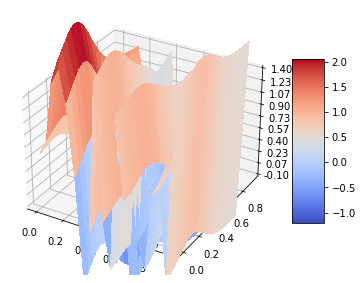

In [3]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y, noise_std=1, add_noise=True)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])
plot_Franke(fig, ax, x, y, z)

The addition of a standard normal distributed noise to the FrankeFunction causes significant deviations from the original output, as shown in figure above. Consequently, the new output values ranges greatly beyond 0 and 1, with multiple outliers. The large variation can raise some problems when fitting a polynomial. To disclose this, one can scale the data and check for performance improvements. The following code blocks generate the OLS algorith and error statistics, add polynomial features, test the implementations and eventually runs them.

In [4]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, LinearRegression
import pandas as pd

In [5]:
def xyz_1D(n_points):
    """Create mesh from inputs, and reshape inputs and outputs to vectors.
    """
    x = np.arange(0, 1, 1/n_points)
    y = np.arange(0, 1, 1/n_points)
    x, y = np.meshgrid(x, y)

    x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
    y_1d = np.ravel(y).reshape(np.size(y), 1)
    x_y = np.hstack((x_1d, y_1d))

    z = FrankeFunction(x, y, add_noise=True)
    z_1d = np.ravel(z) # Convert to 1d vector to make it compatible with new matrix x_y
    return x, y, x_y, z_1d

In [6]:
x, y, x_y, z_1d = xyz_1D(10)

#### Fundamentals for OLS

Notice that we set ```fit_intercept=False```, which means that the intercept in our design matrix is preserved as it is during the fit. For ordinary least squares, whether we decide to include the intercept or not won't affect the error of our fit. However, if we want scikit to handle the intercept through ```fit_intercept=True``` we need to scale our input and output by subtracting the corresponding mean values - in order to reproduce the same results manually. Therefore, to keep things simple, we decide to not bully the intercept.

In [7]:
def OLS_scikit(X, Xpred, y):
    linreg = LinearRegression(fit_intercept=False)
    linreg.fit(X, y)
    beta = linreg.coef_
    inv_cov = np.linalg.pinv(X.T @ X)
    y_pred = linreg.predict(Xpred)
    return y_pred, inv_cov, beta

In [8]:
def OLS_self(X, Xpred, y):
    inv_cov = np.linalg.pinv(X.T @ X)
    beta = inv_cov @ X.T @ y # Use pinv to resolve problem inverting singular matrices
    ypred = Xpred @ beta
    return ypred, inv_cov, beta

In [9]:
def R2(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

def MSE(y_true, y_pred):
    n = np.size(y_pred)
    return np.sum((y_true-y_pred)**2)/n

In [10]:
def create_X(x, y, n):
    """Create design matrix consisting of polynomial features of x and y, up to degree n.
    Args:
        x (array): 2D-array of x-coordinates
        y (array): 2D-array of y-coordinates
        n (int): number of polynomial degrees
    Returns:
        (array): 2D-array of polynomial features of x and y
        
    """
    if len(x.shape) > 1: # Reduce vectors to 1D
        x = np.ravel(x)
        y = np.ravel(y)

    N = len(x)
    l = int((n+1)*(n+2)/2) # Number of elements in beta (x, y, xy, x*x, ...)
    X = np.ones((N,l)) # (inputs, features)

    for i in range(1,n+1):
        q = int((i)*(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (x**(i-k))*(y**k) # Insert all 2D polynomial features (in total l columns assigned)
    
    return X

In [11]:
def scaling_train_test(scale, train, test):
    scl = scale()
    scl.fit(train)
    train_scaled = scl.transform(train)
    test_scaled = scl.transform(test) # Scale test set using same statistical parameters as for train set
    return train_scaled, test_scaled

In [12]:
def centering(x_train, x_test):
    x_train_scaled = x_train - np.mean(x_train, axis=0)
    x_test_scaled = x_test - np.mean(x_train, axis=0) 
    return x_train_scaled, x_test_scaled

#### Test of implementation

In the implementing my own code for OLS I have used the pseudo-inverse to invert the matrix $X^T X$ to avoid issues with potential singularities. The pseudo-inverse utilizes the singular value decomposition behind the scenes. To check if the inversion process is as expected, I compare with scikit's own inversion functionality.

In [13]:
def test_error_implementation():
    """Test to see if error scores are implemented correctly,
    compared with scikit's error functions.
    """
    y_true = np.array([3.56, 7.5, 6.13])
    y_pred = np.array([4.22, 7.9, 6.01])
    mse_self = MSE(y_true, y_pred)
    mse_scikit = mean_squared_error(y_true, y_pred)
    r2_self = R2(y_true, y_pred)
    r2_scikit = r2_score(y_true, y_pred)
    
    assert np.allclose(mse_self, mse_scikit)
    assert np.allclose(r2_self, r2_scikit)
    
test_error_implementation()

In [14]:
def test_centering():
    x, y, x_y, z = xyz_1D(20)
    X_train, X_test, z_train, z_test = train_test_split(x_y, z)

    std = StandardScaler(with_std=False)
    std.fit(X_train)
    X_train1 = std.transform(X_train)
    X_test1 = std.transform(X_test)

    X_train2, X_test2 = centering(X_train, X_test)

    assert np.allclose(X_train1, X_train2)
    assert np.allclose(X_test1, X_test2)
    
test_centering()

In [15]:
def test_design_matrix():
    n = 3
    x = np.arange(0, 1, 0.1)
    y = np.arange(0, 0.5, 0.05)
    X_own = create_X(x, y, n)
    
    poly = PolynomialFeatures(degree=n)
    X_scikit = poly.fit_transform(np.vstack([x,y]).T)
    
    assert X_own.shape == X_scikit.shape # Check that the methods include same polynomial features
    
    for col in range(len(X_own)):
        assert np.allclose(X_own[col], X_scikit[col]) # Check that polynomial features match for each vector
    
test_design_matrix()

In [16]:
def test_OLS_implementation():
    x, y, x_y, z_1d = xyz_1D(50)

    X = create_X(x_y[:,0], x_y[:,1], 5)
    X_train, X_test, z_train, z_test = train_test_split(X, z_1d, test_size=0.2, random_state=2020)

    X_train, X_test = scaling_train_test(StandardScaler, X_train, X_test)

    z_tilde, inv_cov, beta = OLS_scikit(X_train, X_train, z_train)
    z_pred, _, _ = OLS_scikit(X_train, X_test, z_train) # Training on same data set, so beta is same as above

    z_tilde2, inv_cov2, beta2 = OLS_self(X_train, X_train, z_train)
    z_pred2, _, _ = OLS_self(X_train, X_test, z_train)
    
    assert np.allclose(z_tilde, z_tilde2)
    assert np.allclose(beta, beta2)
    assert np.allclose(z_pred, z_pred2)
    
test_OLS_implementation()

#### OLS algorithm

In [17]:
def run_OLS(x_y, z, nr_deg, scale=None):
    """Run OLS on input data x and y and targets z.
    Args:
        x, y (array): 1D arrays of coordinates
        z (array): 1D array of target values
    Returns:
        
    """
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    
    if scale=='centering':
        X_train, X_test = centering(X_train, X_test)
    elif scale is not None:
        X_train, X_test = scaling_train_test(scale, X_train, X_test)
        
    z_tilde, inv_cov, beta = OLS_scikit(X_train, X_train, z_train)
    z_pred, _, _ = OLS_scikit(X_train, X_test, z_train) # Training on same data set, so beta is same as above
    
    return z_train, z_test, z_tilde, z_pred, beta, inv_cov

In [18]:
def OLS_get_stats(z_train, z_test, z_tilde, z_pred, betas, inv_cov):
    """Calculate error measures (MSE and R2) for given predictions and targets,
    and the confidence interval of the mean optimal parameter beta.
    
    """
    mse_train = MSE(z_train, z_tilde)
    mse_test = MSE(z_test, z_pred)
    r2_train = R2(z_train, z_tilde)
    r2_test = R2(z_test, z_pred)
    
    errors = np.array([round(mse_train, 5), round(mse_test, 5), round(r2_train, 5), round(r2_test, 5)])
    
    cov_betas = noise_std**2*inv_cov # Analytical expression for the covariance of beta
    var_betas = np.diag(cov_betas) # Variances are the diagonal entries of covariance matrix
    sigma = np.sqrt(var_betas)
    
    # Use the common two-sigma to define our CI
    CI_lower = betas - 2*sigma 
    CI_upper = betas + 2*sigma 
    
    CI = np.array([[low, up] for low, up in zip(CI_lower, CI_upper)])
    
    return errors, CI

In [19]:
x, y, x_y, z_1d = xyz_1D(50)

Es = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), \
      'MinMaxScaler':np.zeros(len(x)), 'Centering':np.zeros(len(x))} # Errors
betas = {'Unscaled':np.zeros(len(x)), 'StandardScaler':np.zeros(len(x)), \
         'MinMaxScaler':np.zeros(len(x)), 'Centering':np.zeros(len(x))}
deg = 5

for scaler in StandardScaler, MinMaxScaler, 'centering':
    
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d, nr_deg=deg)
    z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, beta_scale, inv_cov_scale \
                            = run_OLS(x_y, z_1d, nr_deg=deg, scale=scaler)

    E_unscale, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    E_scale, CI_scale = OLS_get_stats(z_train_scale, z_test_scale, z_tilde_scale, z_pred_scale, \
                                        beta_scale, inv_cov_scale)
        
    if scaler==StandardScaler or scaler==MinMaxScaler:
        Es[scaler.__name__] = E_scale
        betas[scaler.__name__] = beta_scale
        
    else:
        Es['Unscaled'] = E_unscale # Only append unscaled error once
        betas['Unscaled'] = beta
        
        Es['Centering'] = E_scale
        betas['Centering'] = beta_scale
        CI = CI_scale # Only calculate confidence interval when using centered scaling

In [20]:
def plot_prediction(fig, ax, x_y, beta, deg, clr=cm.coolwarm):
    x_y_new = create_X(x_y[:,0], x_y[:,1], deg)
    x_y_new, _ = centering(x_y_new, x_y_new)
    pred = x_y_new @ beta
    pred = pred.reshape(len(x), len(y))
    
    plot_Franke(fig, ax, x, y, pred, clr)
   
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[6,6])
#plot_prediction(fig, ax, x_y, beta, deg)
##plt.show()

Degree 2 | Degree 5 | Degree 10
- | - | -
![alt](figs/plotFranke_deg2.png) | ![alt](figs/plotFranke_deg5.png) |![alt](figs/plotFranke_deg10.png)

The three plots above show reproduced FrankeFunctions from the trained model for polynomial degrees 2, 5 and 10, respectively. It is clear that a fitted polynomial of degree two is too simplistic and unable to capture the characteristics of the FrankeFunction. On the other hand, a fifth order polynomial seems to be a good fit, because it interpolates rather well with the true FrankeFunction. Lastly, the fitted tenth order polynomial is a worse fit, as it contains too severe fluctuations and spikes that causes overfitting. Conclusively, this visual interpretation gives an indication of what model to select.

In [21]:
E = pd.DataFrame(np.vstack([Es['Unscaled'], Es['StandardScaler'], Es['MinMaxScaler'], Es['Centering']]))
E.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
E.index = ['Unscaled', 'StandardScaler', 'MinMaxScaler', 'Centering']
E

,MSE train,MSE test,R2 train,R2 test
Unscaled,0.91641,1.02983,0.23993,0.21884
StandardScaler,0.96590,1.08556,0.19889,0.17656
MinMaxScaler,0.92104,1.03427,0.23610,0.21548
Centering,0.96590,1.08556,0.19889,0.17656


|   | MSE train	| MSE test | R2 train | R2 test  |
|---|-----------|----------|----------|----------|
| **Unscaled** | 0.93708	| 0.95451  | 0.18836  | 0.18105 |
| **StandardScaler**	| 1.06418	| 1.08566  | 0.07827  | 0.06853 |
| **MinMaxScaler**	| 0.93738	| 0.95510  | 0.18810  | 0.18054 | 

The table above shows the calculated MSE and R2 for the unscaled data and scaled data (StandardScaler and MinMaxScaler). The errors for both training and test data are substantial. This is caused by the random noise added to FrankeFunction, making it less smooth. Thus, higher order polynomials are required to make an accurate fit. 

The general trend is that the scaled data doesn't provide any better error results - they are quite close to the unscaled error and actually slightly worse. The explanation is that the input features $x$ and $y$ can already be considered "scaled", as they are defined uniformly in the interval $[0, \: 1]$. Hence, scaling has essentially little to no effect on this dataset.

It is, however, always a good habit to scale the data before running an algorithm. It will rarely lead to significantly worse results, but will in many cases provide much better results, especially when the input features differ considerably in magnitude. Despite the scaling not providing better performance for this particular dataset, I still choose to scale the data. The recommended scaling is simply to center the data by subtracting the mean value. The reason I don't use StandardScaler is that it could potentially blow up the feature values of our design matrix if their standard deviation is very small. Another reason is that scikit-learn automatically scales the input data by centering it, so that comparing own implemented code with scikit's functionality is feasible.

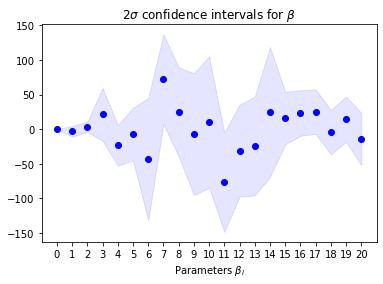

In [22]:
poly_features = np.arange(len(CI))
plt.scatter(poly_features, betas['Centering'], c='b')
plt.fill_between(poly_features, CI[:,0], CI[:,1], color='b', alpha=0.1)
plt.xlabel(r'Parameters $\beta_i$')
plt.title(r'2$\sigma$ confidence intervals for $\beta$')
plt.xticks(range(0, len(poly_features)));

100x100 data points (degree 5) | 1000x1000 data points (degree 5)
- | -
![alt](figs/ex1_100n.png) | ![alt](figs/ex1_1000n.png)

The two plots above show the confidence intervala for the $\beta$ parameters for polynomial inputs of degree five. The parameters are ordered from their corresponding lowest polynomial order to highest polynomial order (e.g. $[1,\:x,\:y,\: \dots , \:x^4 y, \:x^5, \:y^5]$ for fifth order). The left and right plots are for 100 and 1000 data samples, respectively. Notice the larger span of the confidence intervals in the left plot compared to the right plot (note the different scale of y-axis). To explain this, we'll have a look at the formula for the variance of $\beta$:

\begin{equation}
    \text{Var}(\beta) = \sigma_\epsilon^2 (X^T X)^{-1},
\end{equation}

where $\sigma_\epsilon^2$ is the variance of the target values $z$ (given by the random noise in FrankeFunction). The corresponding confidence interval is defined as:

\begin{equation}
     \text{CI} = \big[ \hat{\beta} - 2\sigma, \: \hat{\beta} + 2\sigma \big],
\end{equation}

where $\hat{\beta}$ is the unbiased estimator of the mean value of $\beta$, that is $E[\hat{\beta}] = \hat{\beta}$, and $\sigma$ is the standard deviation of the parameters $\beta$; $\sqrt{\text{Var}(\beta)}$.

We see that a larger variation of noise produces larger variance of the parameters $\beta$, because a more dominant noise will require a more complex model to be fitted, which must be associated with a large fluctuation in the values of $\beta$. Moreover, since the ordered eigenvalues of $X^T X$ correspond to the ordered singular values of $X$, larger singular values will result in lower variance of $\beta$. Hence, the directions of largest singular values provide the most accurate prediction of the optimal values for $\beta$, because the resulting confidence interval will be the narrowest possible.

Thus, the left plot suggests that 100 data points is too few samples for an accurate parameter estimation, especially for this particular model with dominant noise. Including more data points, we have more samples to train our model, mitigating the fluctuations. Thus, we are able to better reproduce the general structure of the data, coinciding with a more "confident" parameter estimation. Even larger variability of the parameters is obtained for 50 data points, as illustrated in [Figure 1](#fig1) in Appendix.

### Exercise 2: Bias-variance trade-off and resampling techniques (score 15 points)

Our aim here is to study the bias-variance trade-off by implementing the **bootstrap** resampling technique.

With a code which does OLS and includes resampling techniques, 
we will now discuss the bias-variance trade-off in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks and basically all Machine Learning algorithms. 

Before you perform an analysis of the bias-variance trade-off on your test data, make
first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and
Friedman. Figure 2.11 of this reference displays only the test and training MSEs. The test MSE can be used to 
indicate possible regions of low/high bias and variance. You will most likely not get an
equally smooth curve!

With this result we move on to the bias-variance trade-off analysis.

Consider a
dataset $\mathcal{L}$ consisting of the data
$\mathbf{X}_\mathcal{L}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$.

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}.
$$

Here $\epsilon$ is normally distributed with mean zero and standard
deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\beta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\beta}$.

The parameters $\boldsymbol{\beta}$ are in turn found by optimizing the means
squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\beta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

Here the expected value $\mathbb{E}$ is the sample value. 

Show that you can rewrite  this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

Explain what the terms mean, which one is the bias and which one is
the variance and discuss their interpretations.

Perform then a bias-variance analysis of the Franke function by
studying the MSE value as function of the complexity of your model.

Discuss the bias and variance trade-off as function
of your model complexity (the degree of the polynomial) and the number
of data points, and possibly also your training and test data using the **bootstrap** resampling method.

Note also that when you calculate the bias, in all applications you don't know the function values $f_i$. You would hence replace them with the actual data points $y_i$.


### Answer:

Now that we have seen how the addition of polynomial features improves the accuracy of our fitted model to the FrankeFunction, it is of interest to do further analysis on the polynomial degrees. By defining a cost function in terms of the mean squared error (MSE), we can compare the expected loss for different polynomial degrees. The result indicates what model performs best, effectively narrowing our search for the optimal model. Moreover, in the real world input data is limited and reduces the reliability of our results. The bootstrapping method can be used to account for this, by continuously resampling the input data and taking the mean of the individual estimates of MSE.

To reconstruct a figure similar to Figure 2.11 in Hastie, we first run simluations of ordinary least squares by fitting models with different polynomial degrees. Afterwards, we can plot the MSE for both training and test data as a function of model complexity (different polynomial degrees).

In [23]:
def mse_decomposition(data, data_pred):
    mse = np.mean(np.mean((data - data_pred)**2, axis=1, keepdims=True))
    bias = np.mean((data - np.mean(data_pred, axis=1, keepdims=True))**2) # E(data_pred) -> take expected value of each column vector
    variance = np.mean((data_pred - np.mean(data_pred, axis=1, keepdims=True))**2)
    return mse, bias, variance

In [24]:
errors = []
from_deg=2; to_deg=30

x, y, x_y, z_1d = xyz_1D(50)

all_mse = np.zeros(to_deg-from_deg)
all_bias = np.zeros(to_deg-from_deg)
all_variance = np.zeros(to_deg-from_deg)

for deg in range(from_deg, to_deg):
    idx = int(deg-from_deg)
    # Transform z to matrix with one column, to calculate mse properly
    z_train, z_test, z_tilde, z_pred, beta, inv_cov = run_OLS(x_y, z_1d.reshape(-1,1), nr_deg=deg, scale='centering')
    all_mse[idx], all_bias[idx], all_variance[idx] = mse_decomposition(z_test, z_pred)
    E, _ = OLS_get_stats(z_train, z_test, z_tilde, z_pred, beta, inv_cov)
    errors.append(E)

In [25]:
df_error = pd.DataFrame(np.vstack(errors))
df_error.rename(columns={0:'MSE train', 1:'MSE test', 2:'R2 train', 3:'R2 test'}, inplace=True)
df_error.index = range(from_deg, to_deg)

In [26]:
def plot_train_test_MSE(poly_degs, mse_train, mse_test, n_samples=False):
    plt.figure(figsize=[10, 5])
    plt.plot(poly_degs, mse_train, label='train')
    plt.plot(poly_degs, mse_test, label='test')
    plt.ylim([min(np.min(mse_train), np.min(mse_test)),
              max(np.max(mse_train), np.max(mse_test))])
    # Stop training at (global) minimum of test MSE
    from_deg = np.min(poly_degs)
    plt.axvline(x=from_deg+np.argmin(mse_test), c='r', linestyle='--', label='optimal model') # index starts from first plotted poly-degree
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    if n_samples:
        plt.title(f'MSE as function of model complexity, n={n_samples} samples')
    else:
        plt.title('MSE as function of model complexity')
    plt.legend()
    plt.show()

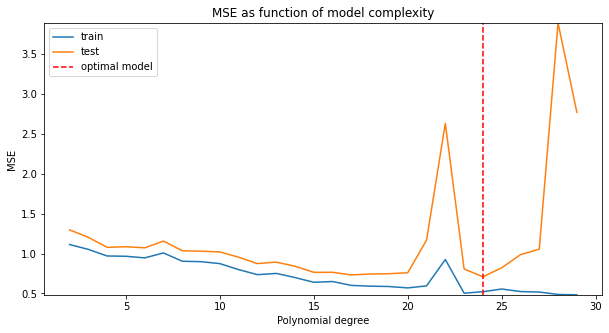

In [27]:
plot_train_test_MSE(df_error.index, df_error['MSE train'], df_error['MSE test'])

![alt](figs/mse_train_test_deg30.png)

Compared to Figure 2.11 in Hastie, the MSE for fitting the FrankeFunction varies less smoothly with model complexity. The training MSE decreases slightly, but steadily with increasing model complexity, whereas the test MSE varies a bit more irregularly. This is most likely due to less data samples to test on (compared to training). Still, it is clear that the test MSE follows a general trend of initial declination before flattening out. Then it rises abruptly, fluctuating wildly up and down. This is the point where the fitted model gets "too" complex, resulting in overfitting. The simulation suggests a minimization of total MSE at polynomial degree 24. This is model selection is debatable, due to the apparent unstable fluctuations occuring after polynomial degree 20. Hence, I believe it's safer to assume an optimal model for polynomial degree between 15 and 20 - right before the apparent overfitting emerges.

The loss function $C(\textbf{X}, \beta)$ represents the net error from our prediction, and is interpreted as the expected squared deviation of the predicted output $\tilde{y}$ from the true target $y$. More specifically, the loss is the mean squared error and can be separated into three parts; a bias, a variance and an irreducible noise. The derivation is as follows:

\begin{align}
    E[(y-\tilde{y})^2] &= E[(y-E(\tilde{y})+E(\tilde{y})-\tilde{y})^2]
\end{align}

The first term,
\begin{equation}
    \frac{1}{n}\sum_i (f_i - E[\tilde{y}])^2,
\end{equation}
is the bias. It represents the systematical error of our fitted model, more specifically - the deviation of the expected output prediction $E[\tilde{y}]$ from the true model $f_i$ (replaced by target $y_i$, since we don't really know the true underlying model). So, if $E[\tilde{y}]$ is adequately far from $f_i$ it implies that the individual predictions $\tilde{y_i}$ are systematically missing its target, expressed as a bias. The bias is illustrated in the figure below.

![alt](figs/bias_fig2.jpg)

The second term,
\begin{equation}
    \frac{1}{n}\sum_i (\tilde{y_i} - E[\tilde{y}])^2,
\end{equation}
is the variance. This represents the $\textit{internal}$ deviation of our predicted model. That is, the net deviation of each predicted output $\tilde{y_i}$ from the expected output prediction $E[\tilde{y}]$. It reflects the distance of each point $\tilde{y_i}$ to the expectation $E[\tilde{y}]$. So, if the quantity is large it means the individual predictions $\tilde{y_i}$ are widely spread out from their mean $E[\tilde{y}]$. The variance is illustrated in the figure below.

![alt](figs/variance_fig2.jpg)

The last term, $\sigma^2$, is simply the irreducible error from the true model itself - it is fixed. Hence, it represents the part of the MSE that can't be tuned or improved by a machine learning algorithm. Consequently, the MSE will be lower bounded by $\sigma^2$, meaning that we are unable to reproduce the desired model $f_i$ perfectly.

| Degree  | MSE train	| MSE test | R2 train | R2 test  |
|---|-----------|----------|----------|----------|
| 2 | 1.26245	| 1.22153  | 0.07287  | -0.17589 |
| 3	| 1.25745	| 1.17456  | 0.07655  | -0.13068 |
| 4	| 1.22921	| 1.18724  | 0.09729  | -0.14288 | 
| 5	| 1.22838	| 1.19255  | 0.09790  | -0.14799 | 
| 6	| 1.20406	| 1.16514  | 0.11576  | -0.12161 |
| 7	| 1.17994	| 1.35011  | 0.13347  | -0.29966 |
| 8	| 1.15629	| 1.31745  | 0.15083  | -0.26823 |
| 9	| 1.13177	| 1.53637  | 0.16884  | -0.47896 |
| 10| 1.11880	| 1.62794  | 0.17837  | -0.56711 |
| 11| 1.11363	| 1.59544  | 0.18217  | -0.53583 |

The table above gives the errors from the simulation (same as those used to plot the bias-variance relation) for training and test set for different model complexities. The MSE in the training set shows a slight but steady decline for increasing model complexity.

The MSE for the test set initially fluctuates a bit up and down, but with a general declining trend. Suddenly, the MSE raises dramatically, indicating overfitting. That is, the trained model is too complex in the sense that it is able to interpolate through most of the fluctuations in the training points of FrankeFunction. A consequence of this overfit is that the model will fail miserably when predicting the test data. The overfitted model is not able to generalize to new unseen data. 

However, for too low model complexity the test MSE is still not that good. This is an example of underfitting - the trained model is too simple compared to the true model. Hence, our predictions become too general, not able to capture important deviations in the data set. The underfitting is not as big of an issue as overfitting for this particular set, but it illustrates the concept of bias and variance as two competing forces against minimizing the MSE.

The minimum of test MSE at the inflection point indicates what model complexity that provide the optimal trade-off between bias and variance, and should serve as a basis for model selection.

#### Bootstrapping

In [28]:
def plot_bias_variance(mse_train, mse_test, bias, variance, from_deg, to_deg):
    plt.figure(figsize=[10, 5])
    degrees = range(from_deg, to_deg)
    plt.plot(degrees, mse_train, c='orange', label='mse train')
    plt.plot(degrees, mse_test, c='b', label='mse test')
    plt.plot(degrees, bias, c='g', label='bias test')
    plt.plot(degrees, variance, c='r', label='variance test')
    plt.xlabel('Polynomial degree')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

In [29]:
from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def bootstrap(xy_train, xy_test, z_train, z_test, B, deg):
    """Perform bootstrapping on input data (x,y), then train an OLS model
    with the resampled set and use it to predict targets z.
    
    Args:
        x, y (1D array): input variables
        z (2D array): target function
        B (int): number of bootstraps
        deg (int): polynomial degree
        
    """        
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression(fit_intercept=False))
    z_tilde = np.zeros((z_train.shape[0], B))
    z_pred = np.zeros((z_test.shape[0], B))
    
    # Centering data
    xy_train, xy_test = centering(xy_train, xy_test)
    
    for i in range(B): # Amounts of bootstraps to perform
        xy_boot, z_boot = resample(xy_train, z_train)
    
        model.fit(xy_boot, z_boot)
        z_tilde[:,i] = model.predict(xy_train)
        z_pred[:,i] = model.predict(xy_test)
        
    mse_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
    mse_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
    
    return mse_train, mse_test, bias_test, var_test

In [30]:
x, y, x_y, z_1d = xyz_1D(50)

In [31]:
from_deg = 1; to_deg = 20 # 17
errors_train = np.zeros(to_deg-from_deg)
errors_test = np.zeros_like(errors_train)
biases = np.zeros_like(errors_train)
variances = np.zeros_like(errors_train)

xy_train, xy_test, z_train, z_test = train_test_split(x_y, z_1d, test_size=0.3, random_state=2124) # Choose 30% test size since number of data samples is reduced

for d in range(from_deg, to_deg):
    
    error_train, error_test, bias_test, var_test = bootstrap(xy_train, xy_test, z_train, z_test, 100, d)
    
    errors_train[d-from_deg] = error_train # subtract from_deg to start at index 0
    errors_test[d-from_deg] = error_test 
    biases[d-from_deg] = bias_test
    variances[d-from_deg] = var_test

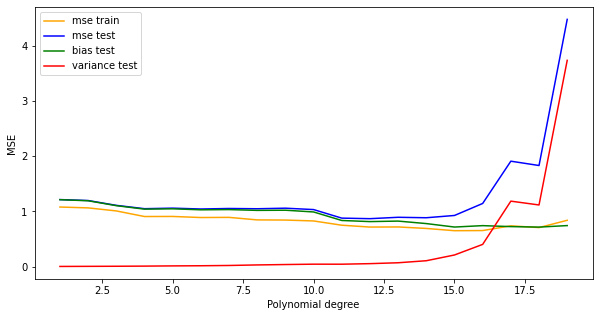

In [32]:
plot_bias_variance(errors_train, errors_test, biases, variances, from_deg, to_deg)

![alt](figs/boot_bias_var_50n_100B.png)

The plot above shows the decomposition of the MSE into bias and variance for the test data as well as the MSE for training data, using 50x50 samples and 100 bootstraps. The simulation shows that a large polynomial degree is required to reduce the bias, as well as increasing the variance. The FrankeFunction with standard deviation 1 is so noisy that even a high ordered polynomial model will possess significant bias, although slightly reduced. Variance, on the other hand, suddenly increases rapidly for a certain high polynomial degree - as a result of the fitted model generating numerous spikes between the target points for the test data. This is the complexity level where the model starts overfitting, and indicates that we are moving from a bias-dominated region to a variance-dominated region. On the contrary, the training MSE is slightly but consistently decreasing, as our trained model gets better and better for high order polynomials. Hence, a good trade-off between bias and variance is achieved around this region (polynomial order 11-12 for this simulation), and is indicative of optimal model selection.

In [33]:
errors_test.min()

0.8684738465160511

### TO-DO:
#### Derive expression for MSE

### Exercise 3:  Cross-validation as resampling techniques, adding more complexity (score 15 points)

The aim here is to write your own code for another widely popular
resampling technique, the so-called cross-validation method.  Again,
before you start with cross-validation approach, you should scale your
data.

Implement the $k$-fold cross-validation algorithm (write your own
code) and evaluate again the MSE function resulting
from the test folds. You can compare your own code with that from
**Scikit-Learn** if needed. 

Compare the MSE you get from your cross-validation code with the one
you got from your **bootstrap** code. Comment your results. Try $5-10$
folds.  You can also compare your own cross-validation code with the
one provided by **Scikit-Learn**.

### Answer

Cross-validation (CV) is another resampling technique to improve the fit of a model. In contrast to the individual shuffling done by bootstrap, CV splits the input data into $k$ folds, letting $k-1$ be training data and the remaining fold test data. This subset generation is performed $k$ times, creating $k$ different model fits that can be compared to provide a better model. Since we have the freedome to choose the size of the folds, it is a great tool for datasets with few samples.

We have already assessed different models by the bootstrap method. Comparing the results from bootstrap with the results from CV, we get an indication of the precision and reliability of the errors in our fitted model. Optimally, we want a minimal deviation between the different results.

In [34]:
from sklearn.model_selection import cross_val_score, KFold

x, y, x_y, z_1d = xyz_1D(100)

def linreg_CV(x_y, z, k_fold, k=5, degree=5):
    mse_kfold = np.zeros(k)

    linreg = LinearRegression(fit_intercept=False)
    
    i = 0
    for train_idx, test_idx in k_fold.split(x_y): # Split input data into bins of train and test
        x_train = x_y[train_idx] # Assign training data based on split
        z_train = z[train_idx]
        x_test = x_y[test_idx]
        z_test = z[test_idx]
      
        x_train, x_test = centering(x_train, x_test)
        X_train = create_X(x_train[:,0], x_train[:,1], degree)
        X_test = create_X(x_test[:,0], x_test[:,1], degree)

        linreg.fit(X_train, z_train)
        z_pred = linreg.predict(X_test)

        mse_kfold[i] = np.sum((z_pred - z_test)**2)/np.size(z_pred) # Retain MSE before starting on new fold
        i += 1

    estimated_mse_kfold = np.mean(mse_kfold)
    return estimated_mse_kfold

In [35]:
def CV_Franke(x_y, z, kfolds, maxdeg, plot_scikit=False):
    polydegs = np.arange(1, maxdeg)
    mse_kfold = np.zeros(maxdeg-1)
    scikit_mse_kfold = np.zeros(maxdeg-1)

    fig, ax = plt.subplots(1,2, figsize=[16,4])
    
    for i, k in enumerate(kfolds):
        k_fold = KFold(n_splits = k)

        for deg in range(1, maxdeg):
            estimated_mse_kfold = linreg_CV(x_y, z, k_fold, k=k, degree=deg)
            mse_kfold[deg-1] = estimated_mse_kfold

            if plot_scikit:
                
                OLS = LinearRegression(fit_intercept=False)
                x_y_scaled = x_y - np.mean(x_y, axis=0) # Center data
                X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

                estimated_mse = cross_val_score(OLS, X, z, scoring='neg_mean_squared_error', cv=k_fold)
                scikit_mse_kfold[deg-1] = np.mean(-estimated_mse)
                
        deg_stop = k+5 if i==0 else k+8 
        ax[i].plot(polydegs[:deg_stop], mse_kfold[:deg_stop], c='b', label='Own code')
        if plot_scikit:
            ax[i].plot(polydegs[:deg_stop], scikit_mse_kfold[:deg_stop], c='g', linestyle='--', label='Scikit')
        ax[i].set(xlabel='Polynomial degree', ylabel='MSE', title=f'Estimated test MSE using CV, k={k} folds')
        ax[i].legend()
    plt.show()
    
    return mse_kfold, scikit_mse_kfold

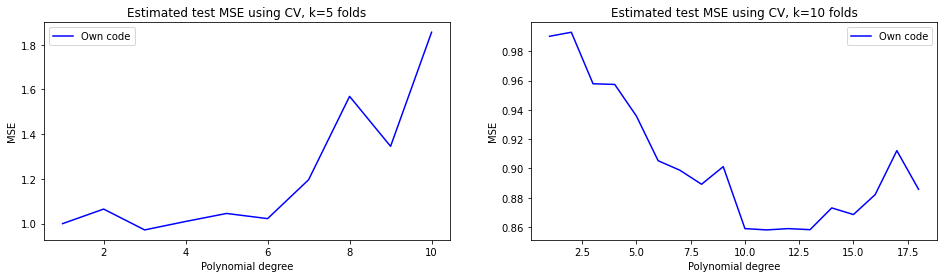

In [36]:
maxdeg = 20 # 18
kfolds = [5, 10]
own_mse_cv, scikit_mse_cv = CV_Franke(x_y, z_1d, kfolds, maxdeg)

![alt](figs/ex3_cv_own.png)

The two plots above show the expected MSE for test data using k-fold cross-validation for $k=5$ and $k=10$ folds, respectively. Interestingly, the optimal model complexity (that is, accompanied by lowest MSE) is remarkably different for the two folds. Using $k=5$, the lowest obtained MSE is for a model with polynomial degree in the range 3-4, whereas for $k=10$ it is in the range 10-13. 

Reminding ourselves of the effect of the number of folds $k$ in the train-test-splitting, the results do make sense. When $k$ is low, e.g. 5, the training sets for the different splits are more likely to be different, in contrast to a large $k$ where much of the same data is aquired in the reshuffling for training sets. Therefore, for low $k$ the model must adapt to quite different sets of data for each split, pushing the fitted model towards more generalization. This is evidenced in the plot for $k=5$ as a high initial bias (compare the MSE for low order polynomials with that for $k=10$) that hardly reduces over time. Fewer datapoints used for training implies a generally weaker model. The MSE explodes at polynomial degree 10, where overfitting really emerges.

If $k$ is larger, e.g. 10, substantially more data is used for training, which makes the model a better fit to the targets. Hence, it is able to adapt a model of higher complexity before starting to overfit, as evidenced by the convex region of the MSE in the plot for $k=10$.

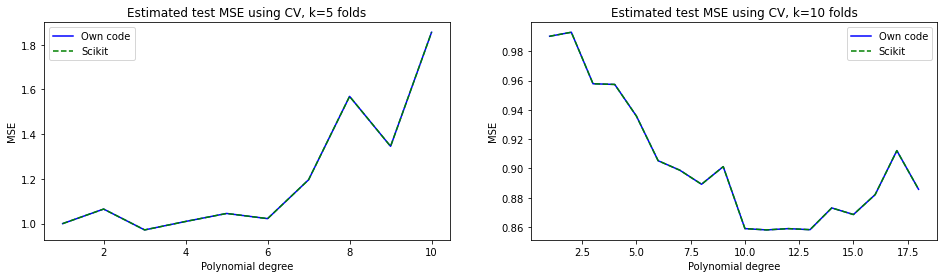

In [37]:
own_mse_cv, scikit_mse_cv = CV_Franke(x_y, z_1d, kfolds, maxdeg, plot_scikit=True)

In [38]:
min(scikit_mse_cv)

0.8579884479227431

![alt](figs/ex3_cv_scikit.png)

The plots above show the same experiment but using scikit's functionality for cross-validation. Compared to my own implementation of cross-validation it is a perfect fit. Hence, the comparison serves as a verification that my own implementation of CV is correct.

**Comparison to bootstrap**

Cross-validation using $k=10$ shows some similar characteristics to the bootstrap simulation. They both suggestion a rather high model complexity as the best model; specifically a polynomial fit of degree 11-12. Moreover, the estimated test MSE is remarkably similar, with a value of $0.868$ and $0.858$ for bootstrap and CV, respectively. Hence, CV using 10 folds seems to provide the most reliable estimate of the minimum MSE, as it provides an estimate on the same wavelength with bootstrap, in addition to exhibit the expected bias-variance tradoff-pattern. The large differences between 5- and 10-fold CV suggests that the performance of our model greatly depends on amount of data samples used for training.

### Exercise 4: Ridge Regression on the Franke function  with resampling (score 20 points)

Write your own code for the Ridge method, either using matrix
inversion or the singular value decomposition as done in the previous
exercise. Perform the same bootstrap analysis as in the
Exercise 2  (for the same polynomials) and the cross-validation  in exercise 3 but now for different values of $\lambda$. Compare and
analyze your results with those obtained in exercises 1-3. Study the
dependence on $\lambda$.

Study also the bias-variance trade-off as function of various values of
the parameter $\lambda$. For the bias-variance trade-off, use the **bootstrap** resampling method. Comment your results. 

#### Run bootstrap simulation for each poly-degree, storing the best (minimum) $\lambda$ for each degree.
#### After all runs, choose the model (poly-degree) with the lowest $\lambda$ found.
#### Compare corresponding minimum MSE with min MSE obtained from OLS with bootstrap/CV

### Answer

In the previous exercises we have seen that the minimum test MSE obtained is far from optimal - a mutual agreement between the methods used. Thus, one should raise the question; is it possible to further reduce the error? The noisy FrankeFunction is quite spiky, resulting in a highly fluctuating fitted model. This generates large variations in predicted target values, accompanied by parameters $\beta$ large in magnitude. However, the underlying function is smoother. So, to improve the fit one should dampen the values of $\beta$. Mathematically, it means restraining $\beta$ by adding a term in the minimization function; the L2-norm of $\beta$. This is what ridge regression does. In the following, we run bootstrap simulations of ridge regression, and compare the estimated MSE with that obtained with OLS, to see if we can make an even better fit to FrankeFunction.

#### Bootstrap

In [39]:
def ridge(X, Xpred, y, lmb):
    inv = np.linalg.pinv(X.T @ X + np.eye(len(X.T))*lmb)
    beta = inv @ X.T @ y # Use pinv to resolve problem inverting singular matrices
    ypred = Xpred @ beta
    return ypred, beta

In [40]:
def run_ridge(x_y, z, nr_deg, lmb):
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    
    X_train, X_test = centering(X_train, X_test)
    
    z_tilde, beta = ridge(X_train, X_train, z_train, lmb)
    z_pred, _ = ridge(X_train, X_test, z_train, lmb)
    
    return z_tilde, z_pred, beta

Because of the additional regularization term in the minimization function, the error in the model fit is no longer independent of the intercept $\beta_0$, as it was for OLS. Excluding the intercept would hence lead to an overoptimistic mean squared error. Therefore, it is vital to set ```fit_intercept=False``` to prevent Ridge from removing the intercept from our design matrix.

In [41]:
def ridge_scikit(x_y, z, nr_deg, lmb):
    X = create_X(x_y[:,0], x_y[:,1], nr_deg)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=2020)
    X_train, X_test = centering(X_train, X_test)
    
    model = Ridge(lmb, fit_intercept=False)
    model.fit(X_train, z_train)
    beta = model.coef_
    z_tilde = model.predict(X_train)
    z_pred = model.predict(X_test)
    
    return z_tilde, z_pred, beta

In [42]:
def test_ridge_implementation():
    x, y, x_y, z_1d = xyz_1D(50)
    z_tilde1, z_pred1, beta1 = run_ridge(x_y, z_1d, 5, 0.1)
    z_tilde2, z_pred2, beta2 = ridge_scikit(x_y, z_1d, 5, 0.1)
    
    assert np.allclose(z_tilde1, z_tilde2), f'{z_tilde1} /= {z_tilde2}'
    assert np.allclose(z_pred1, z_pred2), f'{z_pred1} /= {z_pred2}'
    assert np.allclose(beta1, beta2), f'{beta1} /= {beta2}'
    
test_ridge_implementation()

In [43]:
x, y, x_y, z_1d = xyz_1D(50)

In [44]:
# Ridge Bootstrap
lambdas = np.logspace(-4, 4, 9)
min_deg = 1
max_deg = 16
degrees = np.arange(min_deg, max_deg+1)
mse_train_ridge = np.zeros((len(lambdas), len(degrees)))
mse_test_ridge = np.zeros_like(mse_train_ridge)
biases_ridge = np.zeros_like(mse_train_ridge)
variances_ridge = np.zeros_like(mse_train_ridge)

B = 50 #100 # nr bootstraps

def ridge_bootstrap(x_y, z, B, deg):
    # Intermediate storage of errors (for given degree)
    mse_train_deg = np.zeros(len(lambdas))
    mse_test_deg = np.zeros_like(mse_train_deg)
    biases_deg = np.zeros_like(mse_test_deg)
    variances_deg = np.zeros_like(mse_test_deg)

    for i, lmb in enumerate(lambdas):
        X = create_X(x_y[:,0], x_y[:,1], deg)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=2124)

        X_train, X_test = centering(X_train, X_test) # Scale before starting resampling

        z_tilde = np.zeros((z_train.shape[0], B))
        z_pred = np.zeros((z_test.shape[0], B))

        for b in range(B):
            X_boot, z_boot = resample(X_train, z_train)

            z_tilde[:, b], beta = ridge(X_boot, X_train, z_boot, lmb) # Train on bootstrapped sample, predict on original training data
            z_pred[:, b], _ = ridge(X_boot, X_test, z_boot, lmb) # Train on bootstrapped sample, predict on test data

        error_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
        error_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
        
        mse_train_deg[i] = error_train
        mse_test_deg[i] = error_test
        biases_deg[i] = bias_test
        variances_deg[i] = var_test
        
    return mse_train_deg, mse_test_deg, biases_deg, variances_deg

In [45]:
for deg in degrees:
    mse_train_deg, mse_test_deg, bias_deg, var_deg = ridge_bootstrap(x_y, z_1d, B, deg)
    
    mse_train_ridge[:, deg-min_deg] = mse_train_deg
    mse_test_ridge[:, deg-min_deg] = mse_test_deg
    biases_ridge[:, deg-min_deg] = bias_deg
    variances_ridge[:, deg-min_deg] = var_deg

In [46]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.vstack([np.hstack(mse_train_ridge.T), np.hstack(mse_test_ridge.T), \
                  np.hstack(biases_ridge.T), np.hstack(variances_ridge.T)])
df_ridge_boot = pd.DataFrame(data, index=['MSE train', 'MSE test', 'Bias test', 'Variance test'], columns=idx)

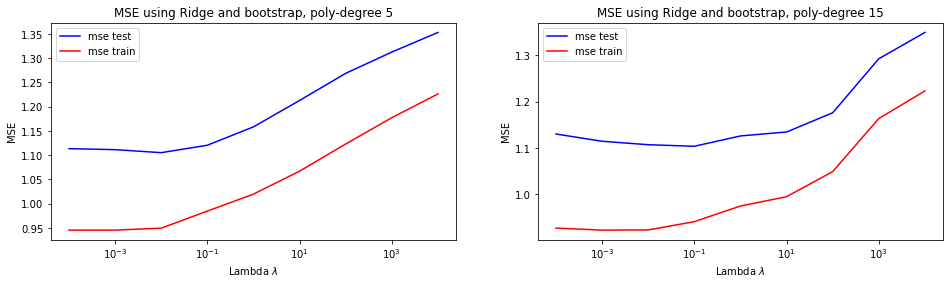

In [47]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_ridge_boot.loc['MSE test'][deg], c='b', label='mse test')
    ax[i].semilogx(lambdas, df_ridge_boot.loc['MSE train'][deg], c='r', label='mse train')
    #plt.semilogx(lambdas, biases, c='g', label='bias test')
    #plt.plot(lambdas, variances, c='r', label='variance test')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Ridge and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In [48]:
df_ridge_boot

Degree                1                                               \
Lambda        0.0001     0.0010     0.0100     0.1000     1.0000       
MSE train       1.118279   1.118521   1.118277   1.118511   1.117879   
MSE test        1.284523   1.283667   1.283317   1.283429   1.282928   
Bias test       1.283039   1.281977   1.281887   1.281767   1.281892   
Variance test   0.001484   0.001690   0.001430   0.001663   0.001036   

Degree                                                               2   ...  \
Lambda        10.0000    100.0000   1000.0000     10000.0000 0.0001      ...   
MSE train       1.118615   1.138365   1.210752  1.236759e+00   1.102559  ...   
MSE test        1.281868   1.288056   1.340990  1.362343e+00   1.269767  ...   
Bias test       1.280648   1.287634   1.340967  1.362343e+00   1.266397  ...   
Variance test   0.001220   0.000422   0.000023  3.225050e-07   0.003370  ...   

Degree                15         16                                   \
Lambda        10000.0000 0.0001     0.0010     0.0100     0.1000       
MSE train       1.222979   0.926636   0.924143   0.922514   0.936711   
MSE test        1.349295   1.128182   1.120060   1.105981   1.102845   
Bias test       1.349256   1.102276   1.099972   1.091328   1.093270   
Variance test   0.000038   0.025906   0.020087   0.014653   0.009575   

Degree                                                                
Lambda        1.0000     10.0000    100.0000   1000.0000  10000.0000  
MSE train       0.972951   0.995122   1.045837   1.161355   1.223037  
MSE test        1.124641   1.136565   1.171349   1.288827   1.349305  
Bias test       1.117764   1.131869   1.169364   1.288109   1.349270  
Variance test   0.006877   0.004696   0.001984   0.000718   0.000036  

[4 rows x 144 columns]

[The left and right plots show the dependence of MSE on regularization parameter $\lambda$, for polynomial degree five and fifteen, respectively. Notice that they are almost indistinguishable, suggesting that the minimum estimated MSE is approximately independent of polynomial degree. The minimum MSE is obtained for a low regularization parameter ($\lambda = 10^{-4} \rightarrow 10^{-2}$), and a value of around $1.05$. This is significantly higher than the minimum MSE received from bootstrap of OLS. Hence, according to this bootstrap simulation, Ridge does not lead to any performance improvements when fitting the model.]

The left and right plots show the dependence of MSE on regularization parameter $\lambda$, for polynomial degree five and fifteen, respectively. For polynomial degree five, estimated MSE for test set remains about constant around $1.10$ for low values of $\lambda$, and starts increasing around $\lambda = 0.01$. The fact that the best model performance occur for $\lambda \leq 0.01$ implies that the parameters $\beta$ are not fluctuating severely - so it is not necessary to penalize them significantly. Polynomial fit of degree fifteen show much of the similar properties, but with a slight difference. We observe an initial minor decrease for increasing $\lambda$, reaching a minimum around $1.10$ at $\lambda = 0.1$. So, minimizing MSE is obtained for a larger penalization of $\beta$. Thus, with Ridge and particularly for high-order polynomials, we get a minor improvement of the error by a small penalty of the parameters. However, too large penalty only result in worse estimate of MSE, seemingly for all polynomial orders.

In [49]:
min_mse_lmb_idx = [df_ridge_boot.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_ridge_boot.loc['MSE test'][i].min() for i in degrees]
min_mse_boot = np.vstack([min_mse_lmb, min_mse]).T
min_mse_boot

array([[1.00000000e+01, 1.28186839e+00],
       [1.00000000e-01, 1.26815008e+00],
       [1.00000000e-02, 1.17806376e+00],
       [1.00000000e-03, 1.10508459e+00],
       [1.00000000e-02, 1.10527760e+00],
       [1.00000000e-01, 1.11062582e+00],
       [1.00000000e-04, 1.10394435e+00],
       [1.00000000e-04, 1.10386756e+00],
       [1.00000000e-03, 1.10095276e+00],
       [1.00000000e-03, 1.10064995e+00],
       [1.00000000e-02, 1.10062181e+00],
       [1.00000000e-02, 1.09934945e+00],
       [1.00000000e-02, 1.09995769e+00],
       [1.00000000e-02, 1.10084020e+00],
       [1.00000000e-01, 1.10352949e+00],
       [1.00000000e-01, 1.10284512e+00]])

Let's extrapolate the results to the entire set of polynomials. The table below shows the minimum test MSE achieved with Ridge bootstrap, with corresponding $\lambda$, for different polynomial degrees.

| Degree  | Lambda ($\lambda$)	| MSE test |
|---|-----------|----------|
| 1 | 10   | 1.282    |
| 2 | 1	| 1.268  | 
| 3	| 0.0001	| 1.176  | 
| 4	| 0.001	| 1.104  |
| 5	| 0.01	| 1.107  | 
| 6	| 0.0001	| 1.110  |
| 7	| 0.0001	| 1.106  |
| 8	| 0.001	| 1.105  | 
| 9	| 0.001	| 1.104  | 
| 10| 0.001	| 1.101  |
| 11| 0.01	| 1.100  |
| 12| 0.01   | 1.100  |
| 13| 0.01     | 1.099  |
| 14| 0.01     | 1.099  |
| 15| 0.1     | 1.102  |
| 16| 0.1     | 1.103  |

In general, increasing polynomial degree is associated with decreasing MSE (which seems to approximate a plateau for the highest degrees). Despite the first order polynomial, and some variations for low degrees, there seems to be a trend of the minimum MSE being obtained for larger $\lambda$ as polynomial degree increases. A reasonable explanation is that a larger degree polynomial fit uis usually associated with larger fluctuations, hence its parameters need greater shrinkage. Examining the two highest polynomial degrees, it seems like the MSE starts increasing again, which is most likely caused by increasing variance - a result shared with bootstrap of OLS.

The global minimum test MSE (accounting for decimal precision) is $1.099$, achieved for a model complexity of order 13. The minimum test MSE from bootstrap of OLS was $0.87$, gotten from a polynomial fit of order 12. Despite slight deviation of their minimum MSE, OLS and Ridge provide similar results when it comes to model complexity. Conclusively, and according to the bootstrap method, Ridge does not improve the result of the best chosen model, though.

#### Cross-validation

In [50]:
x, y, x_y, z_1d = xyz_1D(100)

In [51]:
lambdas = np.logspace(-4, 4, 9)

def CV_Ridge(x_y, z, k, deg):
    mse_lambdas = np.zeros(len(lambdas))
    
    k_fold = KFold(n_splits = k)
    x_y_scaled = x_y - np.mean(x_y, axis=0) # Centering

    for i, lmb in enumerate(lambdas):
        ridge = Ridge(alpha=lmb, fit_intercept=False) # Don't fit intercept, since we are including intercept in design matrix
        X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

        estimated_mse = cross_val_score(ridge, X, z, scoring='neg_mean_squared_error', cv=k_fold)
        mse_lambdas[i] = np.mean(-estimated_mse)
    
    return mse_lambdas

In [52]:
min_deg = 1
max_deg = 20
degrees = np.arange(min_deg, max_deg+1)
mse_degrees = np.zeros((len(lambdas), len(degrees)))
k = 5

for deg in degrees:
    mse_lambdas = CV_Ridge(x_y, z_1d, k=k, deg=deg)
    mse_degrees[:,deg-min_deg] = mse_lambdas

In [53]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.hstack(mse_degrees).reshape(1,-1) # Reshape to only give one row
df_ridge_cv = pd.DataFrame(data, index=['MSE test'], columns=idx)

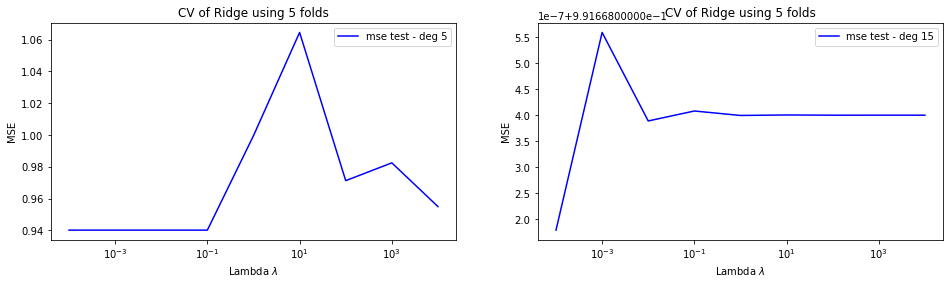

In [54]:
fig, ax = plt.subplots(1,2,figsize=[16, 4])
mse_ridge_cv = lambda deg: np.ravel(df_ridge_cv[deg].values)
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, mse_ridge_cv(deg), c='b', label=f'mse test - deg {deg}')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'CV of Ridge using {k} folds')
    ax[i].legend()
plt.show()

Using cross-validation, the dependency on $\lambda$ is a bit more complicated than for bootstrapping. The plots for $k=5$, for polynomial degree five and fifteen, show quite different dependency on $\lambda$. In both cases, lowest MSE is obtained for low $\lambda$. Still, the large fluctuations make it difficult to come up with an accurate conclusion of the best model, particularly for polynomial degree five - as it looks like the MSE is approaching a minimum for very large $\lambda$. Notice also how much larger the MSE is for polynomial degree fiftheen, apparently saturating around $4.0$ for large values of $\lambda$.

The plots for $k=10$ show much of the same characteristics, but with the difference that the estimated minimum MSE is consistently lower than for 5 fold CV. This is in accordance with the results from cross-validation of OLS. Hence, 10 folds seems to be the CV hyperparameter that provides lowest prediction error for this particular fitting problem.

In [55]:
min_mse_lmb_idx = [df_ridge_cv.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_ridge_cv.loc['MSE test'][i].min() for i in degrees]
min_mse_cv = np.vstack([min_mse_lmb, min_mse]).T

In [56]:
min_mse_cv

array([[1.00000000e+04, 9.61791962e-01],
       [1.00000000e-03, 9.61857989e-01],
       [1.00000000e+03, 9.41854605e-01],
       [1.00000000e+04, 9.40100642e-01],
       [1.00000000e-01, 9.40100628e-01],
       [1.00000000e+04, 9.52251611e-01],
       [1.00000000e+01, 9.52251568e-01],
       [1.00000000e+04, 9.58860654e-01],
       [1.00000000e+03, 9.58860539e-01],
       [1.00000000e-01, 9.88209025e-01],
       [1.00000000e+04, 9.88232331e-01],
       [1.00000000e-04, 9.88232331e-01],
       [1.00000000e-04, 1.00760259e+00],
       [1.00000000e+01, 9.91627599e-01],
       [1.00000000e-04, 9.91668179e-01],
       [1.00000000e-03, 9.91668400e-01],
       [1.00000000e-04, 1.02112031e+00],
       [1.00000000e-03, 1.02112110e+00],
       [1.00000000e-02, 1.06980438e+00],
       [1.00000000e+01, 1.06980442e+00]])

| Degree  | $\lambda$ (5-fold)	| MSE test (5-fold) | $\lambda$ (10-fold)	| MSE test (10-fold) |             
|---|-----------|----------| --------- | --------- |
| 1 | 10000   | 0.962    | 10000   | 0.895    |
| 2 | 0.001	| 0.962  | 10000   | 0.895    |
| 3	| 1000	| 0.942  | 1000   | 0.895    |
| 4	| 10000	| 0.940  |10000   | 0.913    |
| 5	| 0.1	| 0.940  | 0.01   | 0.913    |
| 6	| 10000	| 0.952  |10000   | 0.934    |
| 7	| 10	| 0.952  |10   | 0.934    |
| 8	| 10000	| 0.958  | 10000   | 0.948    |
| 9	| 1000	| 0.958  | 1000   | 0.948    |
| 10| 0.1	| 0.988  |10000   | 0.962    |
| 11| 10000	| 0.988  |10000   | 0.962    |
| 12| 0.0001   | 0.988  |10000   | 0.962    |
| 13| 0.0001     | 1.007  |10000   | 0.962    |
| 14| 10     | 0.992  |10000   | 0.962    |
| 15| 0.0001    | 0.992  |10000   | 0.962    |
| 16| 0.001     |   |10000   | 0.962    |
| 17| 0.0001 | 1.021 |10000   | 0.962    |
| 18| 0.001 | 1.021 |10000   | 0.962    |
| 19| 0.01 | 1.070 |10000   | 0.962    |
| 20| 10 | 1.070 |10000   | 0.962    |

The results of MSE from all polynomial degrees using CV, with $k=5$ and $k=10$ folds, are shown in the left and right table above, respectively. For 5 folds, the minimum estimated test MSE shows a gradual increase for higher polynomial orders. This is in compliance with the result obtained by cross-validation on OLS. Now, another issue is if the MSE value in itself has improved. Cross-validation on Ridge gives a minimum MSE of $0.933$ achieved for polynomial order 2, and CV on OLS gives minimum MSE of $0.971$ achieved for polynomial order 3. Thus, even though cross-validation of OLS and Ridge suggests approximately same optimal model complexity, Ridge provides a slightly better estimated fit. Note, however, that the minimum MSE of $0.933$ (estimated from Ridge) corresponds to a regularization $\lambda = 10^{-4}$. Hence, a very weak penalty is applied, and the Ridge simulation approximates to that of OLS.

For 10 folds, the minimum estimated MSE shows a similar kind of dependency on model complexity as 5 folds. The global minimum is still achieved for a polynomial fit of order 2, but now attains a value of $0.899$. Hence, expanding to 10 folds suggests same optimal model complexity but gives slightly better estimate of the error. The minimum MSE of $0.899$ coincides good with the $0.868$ minimum obtained by 10-fold CV on OLS. The major difference, though, is the suggested optimal model complexity, which is a twelvth order polynomial for OLS. This could perhaps be explained by the regularization parameter associated with the minimum MSE of Ridge, which is $\lambda = 10$. Thus, the parameters are significantly shrunk, and the Ridge method clearly deviates from OLS. 

#### Bias-variance analysis with bootstrap

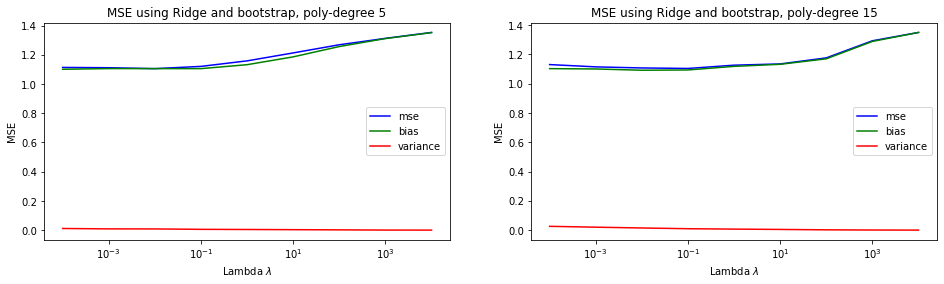

In [57]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_ridge_boot[deg].loc['MSE test'], c='b', label='mse')
    ax[i].semilogx(lambdas, biases_ridge[:, deg], c='g', label='bias')
    ax[i].semilogx(lambdas, variances_ridge[:, deg], c='r', label='variance')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Ridge and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

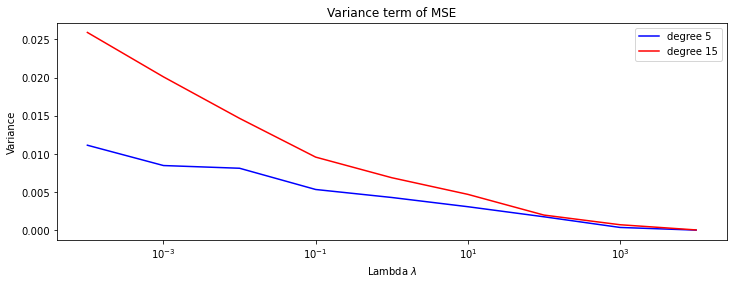

In [58]:
plt.figure(figsize=[12,4])

plt.semilogx(lambdas, variances_ridge[:, plot_deg[0]], c='b', label=f'degree {plot_deg[0]}')
plt.semilogx(lambdas, variances_ridge[:, plot_deg[1]], c='r', label=f'degree {plot_deg[1]}')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Variance')
plt.title('Variance term of MSE')
plt.legend()
plt.show()

The MSE consist almost entirely of bias. The bias increases with increasing $\lambda$, namely because the parameters $\beta$ are shrunken more. In turn, this imposes a smoother and more generalized model fit. Apart from the bias, analysing the bias-variance tradeoff in a single plot is difficult, so we've included an individual plot of the variance. Notice how it decreases monotonically with increasing $\lambda$, both for fifth and fiftheenth order polynomials. This is a direct result of the effect of $\lambda$; larger $\lambda$ will dampen the fluctuations of the fitted model more, effectively reducing the variance. It approaches zero when $\lambda$ gets several orders of magnitude large. There is one important difference, though. The variance is about twice as large for a polynomial fit of order fifteen compared to order five. This is essentially just the fact that a larger degree polynomial fluctuates more than a lower degree polynomial. 

### Exercise 5: Lasso Regression on the Franke function  with resampling (Score 10 points))

This exercise is essentially a repeat of the previous two ones, but now
with Lasso regression. Write either your own code (difficult and optional) or, in this case,
you can also use the functionalities of **Scikit-Learn** (recommended). 
Give a
critical discussion of the three methods and a judgement of which
model fits the data best.  Perform here as well an analysis of the bias-variance trade-off using the **bootstrap** resampling technique and an analysis of the mean squared error using cross-validation. 

### Answer

In [59]:
x, y, x_y, z_1d = xyz_1D(50)

In [60]:
# Lasso Bootstrap
lambdas = np.logspace(-4, 4, 9)
min_deg = 1
max_deg = 16
degrees = np.arange(min_deg, max_deg+1)
mse_train_lasso = np.zeros((len(lambdas), len(degrees)))
mse_test_lasso = np.zeros_like(mse_train_lasso)
biases_lasso = np.zeros_like(mse_train_lasso)
variances_lasso = np.zeros_like(mse_train_lasso)

B = 50#100 # nr bootstraps

def lasso_bootstrap(x_y, z, B, deg, plot_fit=False):
    # Intermediate storage of errors (for given degree)
    mse_train_deg = np.zeros(len(lambdas))
    mse_test_deg = np.zeros_like(mse_train_deg)
    biases_deg = np.zeros_like(mse_test_deg)
    variances_deg = np.zeros_like(mse_test_deg)

    for i, lmb in enumerate(lambdas):
        X = create_X(x_y[:,0], x_y[:,1], deg)
        X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.3, random_state=2124)

        X_train, X_test = centering(X_train, X_test) # Scale before starting resampling

        z_tilde = np.zeros((z_train.shape[0], B))
        z_pred = np.zeros((z_test.shape[0], B))

        for b in range(B):
            X_boot, z_boot = resample(X_train, z_train) # Bootstrap
            
            lasso_model = Lasso(lmb, fit_intercept=False)
            lasso_model.fit(X_boot, z_boot)
            betas = lasso_model.coef_

            z_tilde[:, b] = lasso_model.predict(X_train) # Train on bootstrapped sample, predict on original training data
            z_pred[:, b] = lasso_model.predict(X_test) # Train on bootstrapped sample, predict on test data
            
            if plot_fit:
                if b==0: # Compare fit with true model
                    fig = plt.figure()
                    ax = fig.gca(projection='3d')
                    z_franke = FrankeFunction(x, y, add_noise=False)
                    plot_Franke(fig, ax, x, y, z_franke)
                    plot_prediction(fig, ax, x_y, betas, deg, clr=cm.cool)
                    plt.title(f'deg={deg}, $\lambda$={lmb}')
                    plt.show()
            
                
        error_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_tilde)
        error_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
        
        mse_train_deg[i] = error_train
        mse_test_deg[i] = error_test
        biases_deg[i] = bias_test
        variances_deg[i] = var_test
        
    return mse_train_deg, mse_test_deg, biases_deg, variances_deg

In [61]:
for deg in degrees:
    mse_train_deg, mse_test_deg, bias_deg, var_deg = lasso_bootstrap(x_y, z_1d, 50, deg)
    
    mse_train_lasso[:, deg-min_deg] = mse_train_deg
    mse_test_lasso[:, deg-min_deg] = mse_test_deg
    biases_lasso[:, deg-min_deg] = bias_deg
    variances_lasso[:, deg-min_deg] = var_deg

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 456.3734679867616, tolerance: 0.2125888161760332
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 395.9129408685792, tolerance: 0.21322770518989778
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 366.6793229920212, tolerance: 0.21912559606209303
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.0910384217957, tolerance: 0.22897004177590408
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 404.8639442586841, tolerance: 0.22849841118664851
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.1729411437252, tolerance: 0.22490629590208155
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\line

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.638733213291516, tolerance: 0.2095688618341611
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572.872079578062, tolerance: 0.21381425313177171
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 587.8694267398739, tolerance: 0.21577188590207821
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 523.4075849323121, tolerance: 0.2162946138589674
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 574.4578689913628, tolerance: 0.21806970922537705
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 529.8391820704153, tolerance: 0.2036876914380167
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4309872521521356, tolerance: 0.20940665308459422
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495.6718629946017, tolerance: 0.21465267249316167
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 489.50110269894196, tolerance: 0.21250683650134874
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.12195374114856, tolerance: 0.21553121572015604
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.7496944498108, tolerance: 0.2285631935919838
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.4703095302689, tolerance: 0.20952488688776166
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\line

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6360198308918825, tolerance: 0.21617736952642672
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9228755692490722, tolerance: 0.2111625560432398
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7398330668354447, tolerance: 0.2129530890679199
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\lin

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.9209636021926, tolerance: 0.2160727704642453
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 521.9492604420711, tolerance: 0.21781194517923852
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 633.4334686072505, tolerance: 0.22364023620839435
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 610.2743993892383, tolerance: 0.2172122191692344
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.3353223610782, tolerance: 0.21952307218082243
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 630.9809627346472, tolerance: 0.2229050491542209
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514.2540554754028, tolerance: 0.2170093641419343
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522.1669881355907, tolerance: 0.21338102919444318
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532.6072107266931, tolerance: 0.21806483098574223
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 553.4070539676369, tolerance: 0.22107850089580272
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 486.91939322062245, tolerance: 0.21681904703724905
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 572.1758556657546, tolerance: 0.23243770333997402
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\lin

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.260319126068225, tolerance: 0.21834055810706668
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7059644039072737, tolerance: 0.21629987193787562
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21043561289616264, tolerance: 0.20422945999174194
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\l

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 405.1379840466263, tolerance: 0.21204504867279408
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 317.87928207429775, tolerance: 0.2188516497444938
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.8974211549721, tolerance: 0.21791864723015644
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\line

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 313.00450559819205, tolerance: 0.216420282538409
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 393.87319631128736, tolerance: 0.20804652134501267
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 345.3833273515422, tolerance: 0.2216288493276282
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.400727558540666, tolerance: 0.20619317145978494
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9211337772969728, tolerance: 0.21587918544208165
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8684393535277195, tolerance: 0.2164024692652668
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\lin

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.29782424930454, tolerance: 0.22404202491520828
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 421.74666087569585, tolerance: 0.22376481277729965
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 278.0963937509641, tolerance: 0.211781749437863
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 461.96062004785034, tolerance: 0.23792947038421053
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 370.02365067018854, tolerance: 0.22361777676900602
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402.3957848736383, tolerance: 0.21645316943038115
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2884397252921644, tolerance: 0.2136419367232915
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.34633310186973176, tolerance: 0.20883490307395128
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4164754961655035, tolerance: 0.22350456464916751
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\l

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5629021964393814, tolerance: 0.21547462925902283
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7525184711537349, tolerance: 0.21623198150094433
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23556113859626748, tolerance: 0.22099242510147243
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391.4229733098222, tolerance: 0.22528368946069777
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362.5208750048498, tolerance: 0.20648827331107847
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 422.123015726903, tolerance: 0.21047719952244762
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5842784311375908, tolerance: 0.20810802109298088
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9371970567631251, tolerance: 0.21840770303630025
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6625508523586632, tolerance: 0.21735156427788221
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\l

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.28087521404722793, tolerance: 0.21249767672880326
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5172803326802295, tolerance: 0.21215529993139254
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7122684229934748, tolerance: 0.23191712905300088
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 410.94650158646965, tolerance: 0.2181763227175733
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 447.14463361558023, tolerance: 0.21114033218224804
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 439.20454534113566, tolerance: 0.22066883514143001
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.56122954820717, tolerance: 0.22251311425996928
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466.42759212666897, tolerance: 0.21363600177329195
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 464.27949421830266, tolerance: 0.2196780269037825
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9640407826489081, tolerance: 0.2122724549774063
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2561592695863055, tolerance: 0.22181003116734582
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.22473175190521033, tolerance: 0.2215400308021269
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 496.59724901177594, tolerance: 0.21692429645082248
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516.4982508027654, tolerance: 0.21575765790739307
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 443.55065412439075, tolerance: 0.20959710674473592
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 488.87737170646494, tolerance: 0.2026884347521551
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 498.3415469213071, tolerance: 0.21888050189937358
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.8190989820861, tolerance: 0.21557183367332783
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\line

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6683773970037237, tolerance: 0.21302534080774121
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27108253984533803, tolerance: 0.20893776132805825
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.49869940373309873, tolerance: 0.21226501571206952
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.33227632899888704, tolerance: 0.2226809707105258
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3486951741731446, tolerance: 0.21234252464972825
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3485363118948044, tolerance: 0.20971723906475515
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\l

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 581.8542841542226, tolerance: 0.22361689785809433
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627.4641897943194, tolerance: 0.22637889344732975
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 548.7023882797293, tolerance: 0.2181264295877024
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.7028088491242, tolerance: 0.21307949616044153
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 590.6881896378687, tolerance: 0.21319689864798644
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 611.3031300608453, tolerance: 0.22025168999012104
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\line

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2574206037668318, tolerance: 0.21075976879448327
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9930419717550194, tolerance: 0.22119051915626628
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6917067458675774, tolerance: 0.2231232588041743
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\li

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555.7166028714144, tolerance: 0.22069193882658839
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619.361943502134, tolerance: 0.22270218825981297
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527.4306802413239, tolerance: 0.20931455165474036
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527.5457828654485, tolerance: 0.21268266665343974
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 632.5345598898583, tolerance: 0.22703274015623717
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 567.7652293766462, tolerance: 0.2126548881121421
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2355469930273557, tolerance: 0.2153785802810403
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0860617704904598, tolerance: 0.21913829151919378
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5017652237997936, tolerance: 0.2221278274929118
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\lin

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7376557841730573, tolerance: 0.22093090265552942
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7219902406068286, tolerance: 0.21959667161472082
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45765836701366425, tolerance: 0.22012175857999539
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 526.8108530354364, tolerance: 0.22041582264697582
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 550.886315303552, tolerance: 0.21531945063718233
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 562.2873705288821, tolerance: 0.21972790599873016
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563.9728772095801, tolerance: 0.21216731594113428
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 601.0787635348239, tolerance: 0.2141960119778919
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 599.3102578022363, tolerance: 0.21965122939828394
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23631258401860578, tolerance: 0.21857326287270773
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3238540297468262, tolerance: 0.22727709993578965
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3243767981707606, tolerance: 0.22005556133557402
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 607.0377378707188, tolerance: 0.21698281904380562
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 579.6894348286255, tolerance: 0.2198646244013714
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 634.9305645530021, tolerance: 0.22648490188713336
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 606.6907974738588, tolerance: 0.22269951331497387
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 540.580118174061, tolerance: 0.21169955676279498
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 517.2375543519531, tolerance: 0.20564768305046582
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linea

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7321028141634542, tolerance: 0.21203754937842706
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5385364898188527, tolerance: 0.21751720241760714
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1808688583500953, tolerance: 0.20593602893771232
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\l

C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3036862250958166, tolerance: 0.21737032913917076
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5561619113987035, tolerance: 0.21458900097883252
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37952717446819406, tolerance: 0.21291928183857303
  model = cd_fast.enet_coordinate_descent(
C:\Users\vn123\Anaconda3\envs\fysstk\lib\site-packages\sklearn\

In [62]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
print(np.hstack(variances_lasso.T).shape)
data = np.vstack([np.hstack(mse_train_lasso.T), np.hstack(mse_test_lasso.T), \
                  np.hstack(biases_lasso.T), np.hstack(variances_lasso.T)])
df_lasso_boot = pd.DataFrame(data, index=['MSE train', 'MSE test', 'Bias test', 'Variance test'], columns=idx)

(144,)


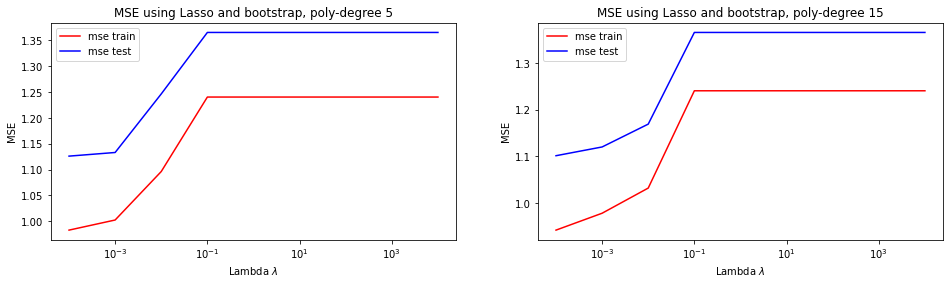

In [63]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_lasso_boot.loc['MSE train'][deg], c='r', label='mse train')
    ax[i].semilogx(lambdas, df_lasso_boot.loc['MSE test'][deg], c='b', label='mse test')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Lasso and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

In the case of Lasso, the plots above clearly illustrates that penalizing parameters $\beta$ does not impose any improvement on the MSE. The MSE has its minimum for a very low $\lambda$ ($10^{-4}$ and less). This essentially just reduces to ordinary least squares. Notice that the MSE reaches saturation in the region $[1.35,\:1.40]$ at $\lambda = 0.1$. The explanation is that all parameters $\beta$ have effectively been sent to zero. Hence, the MSE reaches a maximum at this point.

In [64]:
min_mse_lmb_idx = [df_lasso_boot.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_lasso_boot.loc['MSE test'][i].min() for i in degrees]
min_mse_boot = np.vstack([min_mse_lmb, min_mse]).T

| Degree  | Lambda ($\lambda$)	| MSE test |
|---|-----------|----------|
| 1 | 0.01   | 1.281    |
| 2 | 0.001	| 1.270  | 
| 3	| 0.0001	| 1.186  | 
| 4	| 0.0001	| 1.145  |
| 5	| 0.0001	| 1.126  | 
| 6	| 0.0001	| 1.118  |
| 7	| 0.001	| 1.116  |
| 8	| 0.001	| 1.116  | 
| 9	| 0.001	| 1.117  | 
| 10| 0.001	| 1.118  |
| 11| 0.0001	| 1.115  |
| 12| 0.0001   | 1.110  |
| 13| 0.0001     | 1.107  |
| 14| 0.0001     | 1.104  |
| 15| 0.0001     | 1.101  |
| 16| 0.0001     | 1.097  |

In the table above, we see the minimum MSEs obtained for different polynomials and corresponding $\lambda$, using Lasso bootstrapping. The minimum MSE is smoothly decreasing for higher order polynomial fits, reaching a minimum of $1.096$ - almost indistinguishable from the Ridge bootstrap results. The major difference (compared to Ridge) is what $\lambda$ the minimums occur for. The table shows that all minimum MSE is associated with $\lambda=10^{-3}$ or $\lambda=10^{-4}$ (except first order). Hence, one can safely say that regularization with Lasso does not improve the overall results. 

![alt](figs/ex5_fitFranke_deg15_lmb0-0001.png) | ![alt](figs/ex5_fitFranke_deg15_lmb0-01.png) |![alt](figs/ex5_fitFranke_deg15_lmb100.png)

The three plots above are examples of a fitted fifteen order polynomial model vs. true FrankeFunction using Lasso bootstrapping, for three different values of $\lambda$. The fitted model using $\lambda = 0.0001$ shows considerable fluctuations. The fit contains "too" much variance in the sense that it's not a good reproduction of the true (more smooth) FrankeFunction. Thus, the visual interpretation is that $\lambda = 0.0001$ provides too weak penalty on the parameters $\beta$. They are still too large in magnitude, hence produces too large fluctuations.

For $\lambda = 0.01$ the fitted model looks smoother, and seems to be a better reproduction of the FrankeFunction. That is, the consequence of increasing the penalty from $\lambda = 0.0001$ to $\lambda = 0.01$ is smaller fluctuations that complies better with the FrankeFunction.

Lastly, for $\lambda = 100$, one clearly sees the effect of shrinking the parameters "too" much. The fitted model now possesses little to no variance, but this comes at the cost of a very high bias. The fitted model has become too general, and is not able to capture the main characteristics of FrankeFunction.

In [65]:
# Perform CV, plot result and find minimum MSE to compare with OLS+Ridge

# Analyze bias-variance tradeoff with bootstrap, and compare with OLS+Ridge

In [66]:
x, y, x_y, z_1d = xyz_1D(100)

In [67]:
lambdas = np.logspace(-4, 4, 9)

def CV_Lasso(x_y, z, k, deg):
    mse_lambdas = np.zeros(len(lambdas))
    
    k_fold = KFold(n_splits = k)
    x_y_scaled = x_y - np.mean(x_y, axis=0) # Centering

    for i, lmb in enumerate(lambdas):
        lasso = Lasso(alpha=lmb, fit_intercept=False)
        X = create_X(x_y_scaled[:,0], x_y_scaled[:,1], deg)

        estimated_mse = cross_val_score(lasso, X, z, scoring='neg_mean_squared_error', cv=k_fold)
        mse_lambdas[i] = np.mean(-estimated_mse)
    
    return mse_lambdas

In [68]:
min_deg = 1
max_deg = 20
degrees = np.arange(min_deg, max_deg+1)
mse_deg_lasso = np.zeros((len(lambdas), len(degrees)))
k = 5

for deg in degrees:
    mse_lambdas = CV_Lasso(x_y, z_1d, k=k, deg=deg)
    mse_deg_lasso[:,deg-min_deg] = mse_lambdas

In [69]:
row_headers = [(deg, lmb) for deg in degrees for lmb in lambdas]
idx = pd.MultiIndex.from_tuples(row_headers, names=['Degree', 'Lambda'])
data = np.hstack(mse_deg_lasso).reshape(1,-1) # Reshape to only give one row
df_lasso_cv = pd.DataFrame(data, index=['MSE test'], columns=idx)

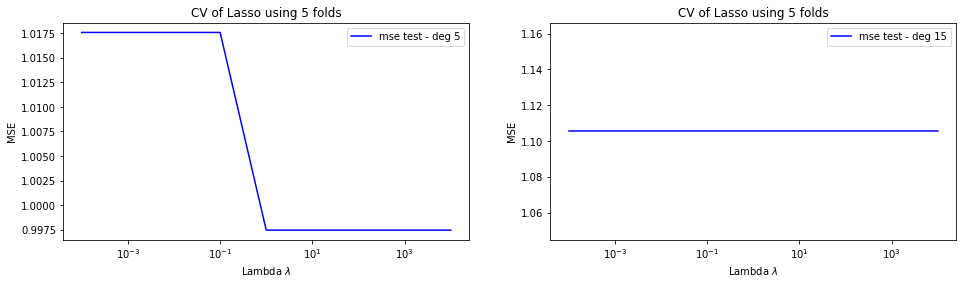

In [70]:
fig, ax = plt.subplots(1,2,figsize=[16, 4])
mse_lasso_cv = lambda deg: np.ravel(df_lasso_cv[deg].values)
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, mse_lasso_cv(deg), c='b', label=f'mse test - deg {deg}')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'CV of Lasso using {k} folds')
    ax[i].legend()
plt.show()

Cross-validation of Lasso produces remarkably different results from cross-validation of Ridge. The estimated MSE is constant at $1.105$ for all $\lambda$ for a polynomial fit of order fifteen - a mutual agreement for 5 and 10 folds. That is, the MSE is independent of regularization. Interestingly, for a polynomial fit of order five, the MSE's dependence on $\lambda$ is opposite for $k=5$ and $k=10$ folds. MSE is minimized at low $\lambda$ for 10 folds and at high $\lambda$ for 5 folds. This result is difficult to interpret, and might indicate numerical inaccuracy or instability. This is substantiated by the fact that the MSE dependency on $\lambda$ is quite consistent across different folds in CV Ridge.
Compared to bootstrapping, CV provides a lower estimated minimum of MSE for low order polynomials, and similar values for high order polynomials.

In [71]:
min_mse_lmb_idx = [df_lasso_cv.loc['MSE test'][i].argmin() for i in degrees]
min_mse_lmb = lambdas[min_mse_lmb_idx]
min_mse = [df_lasso_cv.loc['MSE test'][i].min() for i in degrees]
min_mse_boot = np.vstack([min_mse_lmb, min_mse]).T

| Degree  | $\lambda$ (5-fold)	| MSE test (5-fold) | $\lambda$ (10-fold)	| MSE test (10-fold) |             
|---|-----------|----------| --------- | --------- |
| 1 | 1   | 0.965    | 1   | 0.947    |
| 2 | 0.0001	| 0.965  | 0.0001   | 0.947    |
| 3	| 0.0001	| 0.965  | 0.0001   | 0.947    |
| 4	| 0.0001	| 1.017  |0.0001   | 0.973   |
| 5	| 1	| 0.997  | 0.0001  | 0.973    |
| 6	| 0.0001	| 0.997  |0.0001 | 0.991    |
| 7	| 0.0001	| 0.997  |0.0001   | 0.991    |
| 8	| 0.0001	| 1.086  | 0.0001   | 1.107    |
| 9	| 0.0001	| 1.086  | 0.0001   | 1.107    |
| 10| 0.0001	| 1.105  |0.0001 | 1.105    |
| 11| 0.0001	| 1.105  |0.0001  | 1.105    |
| 12| 0.0001   | 1.105  |0.0001   | 1.105    |
| 13| 0.0001     | 1.105  |0.0001  | 1.105    |
| 14| 0.0001     | 1.105  |0.0001   | 1.105    |
| 15| 0.0001    | 1.105  |0.0001   | 1.105    |
| 16| 0.0001     | 1.105  |0.0001  | 1.105    |
| 17| 0.0001 | 1.105 |0.0001   | 1.105    |
| 18| 0.0001 | 1.105 |0.0001 | 1.105    |
| 19| 0.0001 | 1.105 |0.0001   | 1.105    |
| 20| 0.0001 | 1.105 |0.0001 | 1.105   |

The table of minimum MSEs using CV with Lasso clearly shows that for polynomial degrees larger than nine the minimum MSE remains constant at $1.105$, for all $\lambda$ (and both $k=5$ and $k=10$), as examplified in the previous plot. The stagnation occurs for all polynomial fits of a higher order than nine. An explanation could be that these large order polynomials possess fluctuations so high that all parameters $\beta$ are killed for essentially all $\lambda$. Consistent with CV of Ridge, the lowest minimum MSEs occur for low polynomial orders. However, CV Ridge proposes a rather large $\lambda$ as best model, whereas CV Lasso proposes an apparently infinitely small $\lambda$. 

#### Bias-variance analysis with bootstrap

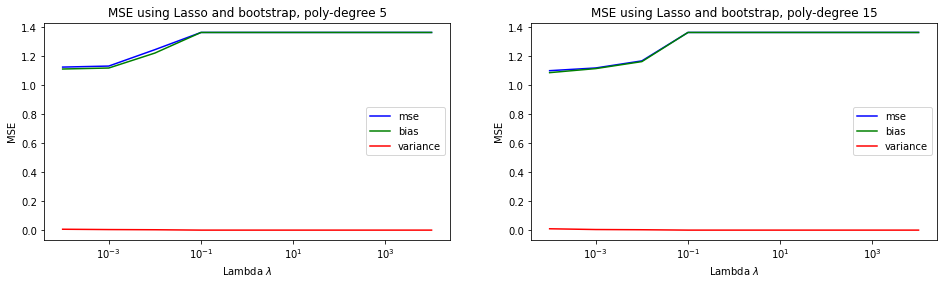

In [72]:
fig, ax = plt.subplots(1,2, figsize=[16,4])
plot_deg = [5, 15]

for i, deg in enumerate(plot_deg):
    ax[i].semilogx(lambdas, df_lasso_boot[deg].loc['MSE test'], c='b', label='mse')
    ax[i].semilogx(lambdas, biases_lasso[:, deg], c='g', label='bias')
    ax[i].semilogx(lambdas, variances_lasso[:, deg], c='r', label='variance')
    ax[i].set(xlabel='Lambda $\lambda$', ylabel='MSE', title=f'MSE using Lasso and bootstrap, poly-degree {deg}')
    ax[i].legend()
plt.show()

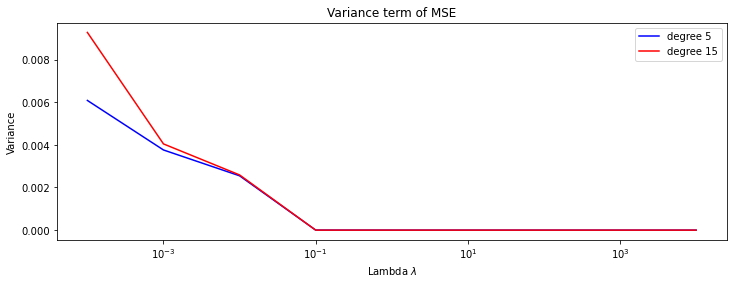

In [73]:
plt.figure(figsize=[12,4])

plt.semilogx(lambdas, variances_lasso[:, plot_deg[0]], c='b', label=f'degree {plot_deg[0]}')
plt.semilogx(lambdas, variances_lasso[:, plot_deg[1]], c='r', label=f'degree {plot_deg[1]}')
plt.xlabel('Lambda $\lambda$')
plt.ylabel('Variance')
plt.title('Variance term of MSE')
plt.legend()
plt.show()

Consistent with the bias-variance trade-off from Ridge, the majority of MSE  from Lasso bootstrapping consist of bias. As mentioned earlier, the estimated MSE reaches a maximum for $\lambda = 0.1$. From the plot of variance, we see that it decreases monotonically with increasing $\lambda$ and hits zero at $\lambda = 0.1$. The explanation is simply similar to that of Ridge, but with the twist that the MSE reaches a point where it has no variance.

To understand why the MSE is decomposed solely into a bias term at $\lambda = 0.1$, recall that the MSE reaches saturation at this value. As explained, this means that all parameters $\beta$ have been killed. To see the connection with zero variance, we need to revisit the formula for the variance

$$ \frac{1}{n}\sum_i (\tilde{y_i} - E[\tilde{y}])^2 $$

The predicted output $i$ is defined as $\tilde{y_i}=X_{i*}\beta_i + \epsilon_i$. We can immediately conclude that this reduces to $\epsilon_i$, because all $\beta_i$ are zero. Consequently, the expected value of the predicted outputs is solely given by the irreducible error, which we showed in exercise 2 was simply zero, $E[\tilde{y}] = E[\epsilon] = 0$. Conclusively, the variance must be zero, and the remaining term is the bias

$$ \frac{1}{n}\sum_i (f_i - E[\tilde{y}])^2 = \frac{1}{n}\sum_i f_i^2 $$

and the irreducible error $\sigma_{\epsilon}^2$.

### Exercise 6: Analysis of real data  (score 30 points)

With our codes functioning and having been tested properly on a
simpler function we are now ready to look at real data. We will
essentially repeat in this exercise what was done in exercises 1-5. However, we
need first to download the data and prepare properly the inputs to our
codes.  We are going to download digital terrain data from the website
<https://earthexplorer.usgs.gov/>,

Or, if you prefer, we have placed selected datafiles at <https://github.com/CompPhysics/MachineLearning/tree/master/doc/Projects/2021/Project1/DataFiles>

In order to obtain data for a specific region, you need to register as
a user (free) at this website and then decide upon which area you want
to fetch the digital terrain data from.  In order to be able to read
the data properly, you need to specify that the format should be **SRTM
Arc-Second Global** and download the data as a **GeoTIF** file.  The
files are then stored in *tif* format which can be imported into a
Python program using

In [74]:
import scipy
scipy.misc.imread

AttributeError: module 'scipy.misc' has no attribute 'imread'

Here is a simple part of a Python code which reads and plots the data
from such files

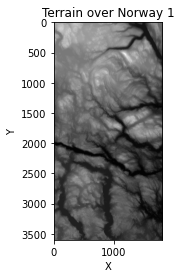

In [75]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Load the terrain
terrain1 = imread('SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

If you should have problems in downloading the digital terrain data,
we provide two examples under the data folder of project 1. One is
from a region close to Stavanger in Norway and the other Møsvatn
Austfjell, again in Norway.
Feel free to produce your own terrain data.


Alternatively, if you would like to use another data set, feel free to do so. This could be data close to your reseach area or simply a data set you found interesting. See for example [kaggle.com](https://www.kaggle.com/datasets) for examples.


Our final part deals with the parameterization of your digital terrain
data (or your own data).  We will apply all three methods for linear regression, the same type (or higher order) of polynomial
approximation and cross-validation as resampling technique to evaluate which
model fits the data best.

At the end, you should present a critical evaluation of your results
and discuss the applicability of these regression methods to the type
of data presented here (either the terrain data we propose or other data sets).



### Answer

In this more practical problem, we are to experiment with regression methods for fitting a real world landscape. A vital part is to compare the different methods implemented earlier, and try to find the best method (with associated hyperparameters) that gives as good as possible fit to the landscape.

The landscape to fit constitutes a high-dimensional dataset, especially when fitting polynomial features to the grid points. Hence, evaluating a fit on the entire landscape could be computationally very expensive, especially for high polynomial degrees. Thus, when fitting high order polynomials we select a limited, coherent part of the landscape to fit our model to. 

We perform the same scaling as in the previous exercises (that is subtracting the mean). The error is as usual evaluated on the scaled data. However, when we are going to visualize our fitted model we need to rescale it back to original size by adding the mean. This is done after the prediction.

Since our goal is to fit a single, specific landscape - and since we have already verified that our implementation of regression works for a "vanilla landscape" (FrankeFunction) - we are not going to split into train and test sets. Instead, we fit and predict on the same data of the landscape. Elevation intervals of other landscapes are completely different with little to no correlations, and the model fitted on our landscape would in all likelihood perform miserably on other landscapes (that is, a new unseen dataset).

In [76]:
import warnings
from scipy.linalg import LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)

In [130]:
class RegressionModel:
    """Regression model that fits data on FrankeFunction, 
    and then predicts the shape of topographic data.
    
    """
    def __init__(self, z, model, deg, lmb=0, lambdas=None):
        self.z = z
        self.x = np.arange(self.z.shape[1]) # columns are x-coords
        self.xshape = self.x.shape
        self.y = np.arange(self.z.shape[0]) # rows are y-coords
        self.yshape = self.y.shape
        
        self.deg = deg
        self.lmb = lmb
        self.lambdas = lambdas
        
        if model==LinearRegression:
            self.model = model(fit_intercept=False)
        else:
            self.model = model(lmb, fit_intercept=False)
        
    def reshape_xyz(self, x, y, z):
        x, y = np.meshgrid(self.x, self.y)

        x_1d = np.ravel(x).reshape(np.size(x), 1) # Turn gridded x into 1d vector
        y_1d = np.ravel(y).reshape(np.size(y), 1)
        x_y = np.hstack((x_1d, y_1d))
        z_1d = np.ravel(z)

        return x, y, x_y, z_1d
        
    """def split_and_scale(self, x, y, z, test_size=0.2):
        x, y, x_y, z_1d = self.reshape_xyz(x, y, z)
        
        X = create_X(x_y[:,0], x_y[:,1], self.deg)
        X_train, X_test, z_train, z_test = train_test_split(X, z_1d, test_size=test_size, random_state=2124)
        X_train, X_test = centering(X_train, X_test)
        
        return X_train, X_test, z_train, z_test"""
    
    def design_and_scale(self, x, y, z):
        x, y, x_y, z_1d = self.reshape_xyz(x, y, z)
        
        X = create_X(x_y[:,0], x_y[:,1], self.deg)
        print(np.mean(z_1d))
        X_scaled = X - np.mean(X, axis=0) # Centering
        
        return X_scaled, z_1d
        
    def fit(self, X, z):
        model.fit(self.X, self.z)
        
    def predict(self, X, z):
        z_pred = model.predict(self.z)
        return z_pred
    
    def cross_validation(self, X, z, k):
        k_fold = KFold(n_splits = k)
    
        pipeline = make_pipeline(StandardScaler(with_std=False), self.model)
        pipeline.fit(X, z)
        z_pred = pipeline.predict(X)

        # Scikit CV to get mse score
        estimated_mse = cross_val_score(pipeline, X, z_1d, scoring='neg_mean_squared_error', cv=k_fold)
        mse_model = np.mean(-estimated_mse)
        
        
        return z_pred, mse_model
    
    
    def cv_gridsearch(self, X, z, k):
        from sklearn.model_selection import GridSearchCV
    
        k_fold = KFold(n_splits = k)
        
        gridsearch = GridSearchCV(estimator=self.model, param_grid=dict(alpha=self.lambdas), cv=k_fold)
        
        gridsearch.fit(X, z)
        z_pred = gridsearch.predict(X)

        best_lambda = gridsearch.best_estimator_.alpha
        print('Best lambda:', best_lambda)
        mse_pred = MSE(z, z_pred)
        
        return z_pred, mse_pred
    
    def plot_fit(self, x, y, z_true, z_pred, nr_gridpoints):
        """Plot true z from input design matrix X_plot, and 
        also a predicted z (of same shape as true z).
        
        Args:
            X_plot: Design matrix of input data to plot
            z_true: Target values of input data
            z_pred: Predicted targets, calculated by a regression method
        
        """
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[10,10])
        
        
        # Transform z_true to 2D
        z_true = z_true.reshape(self.yshape[0], self.xshape[0]) # y correspond to rows, x to columns
        
        # Plot the surface.
        surf = ax.plot_surface(x, y, z_true, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False)       
        
        if z_pred is not None:
            z_pred = z_pred.reshape(self.yshape[0], self.xshape[0]) # Transform z_pred to 2D
            surf_pred = ax.plot_surface(x, y, z_pred, cmap=cm.cool, linewidth=0, antialiased=False)
            fig.colorbar(surf_pred, shrink=0.5, aspect=10)
        
        # Customize the z axis.
        #ax.set_zlim(-0.10, 1.40)
        ax.zaxis.set_major_locator(LinearLocator(6))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%d'))

        # Add a color bar which maps values to colors.
        fig.colorbar(surf, shrink=0.5, aspect=10)
        plt.show()

In [147]:
lambdas = np.logspace(-4, 3, 100)
terrain = RegressionModel(terrain1, Ridge, 3, lmb=0.1, lambdas=lambdas)
print(terrain.x.shape)
print(terrain.y.shape)
z = terrain.z
x, y, x_y, z_1d = terrain.reshape_xyz(terrain.x, terrain.y, z)
print(x.shape)
print(y.shape)
print(z.shape)
grid_points = x_y.shape[0]
#assert (x == x_y[:,0].reshape(1801, 3601)).all()
#assert (y == x_y[:,1].reshape(1801, 3601)).all()

(1801,)
(3601,)
(3601, 1801)
(3601, 1801)
(3601, 1801)


In [148]:
#MSE: Linear: 538 000, Ridge: 565 000, Lasso: 564 000

In [149]:
X_scaled, z_1d = terrain.design_and_scale(terrain.x, terrain.y, z)

703.0221301658911


In [150]:
z_pred, mse_pred = terrain.cv_gridsearch(X_scaled, z_1d, 10)

Best lambda: 1000.0


In [134]:
z_pred, mse_pred = terrain.cross_validation(X_scaled, z_1d, k=10)

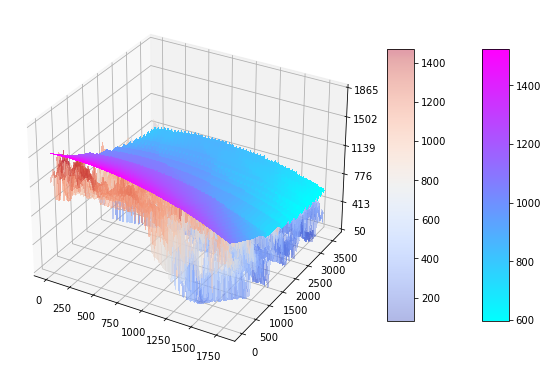

In [151]:
terrain.plot_fit(x, y, z_1d, z_pred+1000, 100)

In [146]:
mse_pred

541725.2504964735

### Appendix

<a id='fig1'></a>
Figure 1: 50x50 data points
![alt](figs/ex1_50n.png)



## Background literature

1. For a discussion and derivation of the variances and mean squared errors using linear regression, see the [Lecture notes on ridge regression by Wessel N. van Wieringen](https://arxiv.org/abs/1509.09169)

2. The textbook of [Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer](https://www.springer.com/gp/book/9780387848570), chapters 3 and 7 are the most relevant ones for the analysis here. 

## Introduction to numerical projects

Here follows a brief recipe and recommendation on how to answer the various questions when preparing your answers. Note that you can answer question by question and there is no need to structure your report as a scientific report with abstract, introduction, theory, results and discussions, conclusions etc. But you have the following elements in mind when you answer the various questions.


  * Give a short description of the nature of the problem and the eventual  numerical methods you have used.

  * Describe the algorithm you have used and/or developed. Here you may find it convenient to use pseudocoding. In many cases you can describe the algorithm in the program itself.

  * Include the source code of your program. Comment your program properly. You should have the code at your GitHub/GitLab link. You can also place the code in an appendix of your report.

  * If possible, try to find analytic solutions, or known limits in order to test your program when developing the code.

  * Include your results either in figure form or in a table. Remember to        label your results. All tables and figures should have relevant captions        and labels on the axes.

  * Try to evaluate the reliabilty and numerical stability/precision of your results. If possible, include a qualitative and/or quantitative discussion of the numerical stability, eventual loss of precision etc.

  * Try to give an interpretation of you results in your answers to  the problems.

  * Critique: if possible include your comments and reflections about the  exercise, whether you felt you learnt something, ideas for improvements and  other thoughts you've made when solving the exercise. We wish to keep this course at the interactive level and your comments can help us improve it.

  * Try to establish a practice where you log your work at the  computerlab. You may find such a logbook very handy at later stages in your work, especially when you don't properly remember  what a previous test version  of your program did. Here you could also record  the time spent on solving the exercise, various algorithms you may have tested or other topics which you feel worthy of mentioning.

## Format for electronic delivery of report and programs

The preferred format for the report is a PDF file. You can also use DOC or postscript formats or as an ipython notebook file.  As programming language we prefer that you choose between C/C++, Fortran2008, Julia or Python. The following prescription should be followed when preparing the report:

  * Use Canvas to hand in your projects, log in  at  <https://www.uio.no/english/services/it/education/canvas/> with your normal UiO username and password.

  * Upload **only** the report file or the link to your GitHub/GitLab or similar typo of  repos!  For the source code file(s) you have developed please provide us with your link to your GitHub/GitLab or similar  domain.  The report file should include all of your discussions and a list of the codes you have developed.  Do not include library files which are available at the course homepage, unless you have made specific changes to them.

  * In your GitHub/GitLab or similar repository, please include a folder which contains selected results. These can be in the form of output from your code for a selected set of runs and input parameters.

Finally, 
we encourage you to collaborate. Optimal working groups consist of 
2-3 students. You can then hand in a common report. 



## Software and needed installations

If you have Python installed (we recommend Python3) and you feel pretty familiar with installing different packages, 
we recommend that you install the following Python packages via **pip** as
1. pip install numpy scipy matplotlib ipython scikit-learn tensorflow sympy pandas pillow

For Python3, replace **pip** with **pip3**.

See below for a discussion of **tensorflow** and **scikit-learn**. 

For OSX users we recommend also, after having installed Xcode, to install **brew**. Brew allows 
for a seamless installation of additional software via for example
1. brew install python3

For Linux users, with its variety of distributions like for example the widely popular Ubuntu distribution
you can use **pip** as well and simply install Python as 
1. sudo apt-get install python3  (or python for python2.7)

etc etc. 

If you don't want to install various Python packages with their dependencies separately, we recommend two widely used distrubutions which set up  all relevant dependencies for Python, namely
1. [Anaconda](https://docs.anaconda.com/) Anaconda is an open source distribution of the Python and R programming languages for large-scale data processing, predictive analytics, and scientific computing, that aims to simplify package management and deployment. Package versions are managed by the package management system **conda**

2. [Enthought canopy](https://www.enthought.com/product/canopy/)  is a Python distribution for scientific and analytic computing distribution and analysis environment, available for free and under a commercial license.

Popular software packages written in Python for ML are

* [Scikit-learn](http://scikit-learn.org/stable/), 

* [Tensorflow](https://www.tensorflow.org/),

* [PyTorch](http://pytorch.org/) and 

* [Keras](https://keras.io/).

These are all freely available at their respective GitHub sites. They 
encompass communities of developers in the thousands or more. And the number
of code developers and contributors keeps increasing.